# Introduction to unsupervised Machine Learning

Francisco Förster Burón
AS4501, Astroinformatics

With notes from Andy Connolly, Mario Juric, Stephen Portillo



In [120]:
# Make the notebook wider
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/var/folders/_n/wp9xhwf53ds8mr70wtgy43b40000gn/T/ipykernel_71360/1326043234.py:2: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



# Unsupervised learning

- No labeled data available
- The goal is to discover "interesting structure" in the data
- Sometimes known as **knowledge discovery**.

More typical of human and animal learning. No expert to manually label the data is required.

*When we're learning to see, nobody's telling us what the right answers are - we just look. Every so often, your mother says "that's a dog", but that's very little information, You'd be lucky if you got a few bits of information - even one bit per second - that way. The brain's visual system has $10^{14}$ neural connections, And you only live for $10^9$ seconds. So it's no use learning one bit per second. You need more like $10^5$ bits per second. And there's only one place you can get that much information: from the input itself*, Geoffrey Hinton, 1996

# **Visualization - always look/plot your data**

**Borkin et al. 2011**: 

"...We present the results of a formal quantitative user study with domain experts that evaluates the effect of 2D versus 3D artery representations and of color maps on identifying regions of low ESS. We show statistically significant results demonstrating that our **2D visualizations are more accurate and efficient than 3D representations**, and that a **perceptually appropriate color map** leads to **fewer diagnostic mistakes than a rainbow color map.**"



![](images/Borkin_2d.png)

![](images/Borkin2011.png)

![](images/arteries.png)


$\Rightarrow$ 

**Good visualization/colormaps can save lives!**

## **Colormaps**

**Requirements for a good color map:**

* Perceptually uniform color - color changes uniformly

* can be printed in black and white

* colorblind friendly

**Jet**
<video controls src="videos/jet.mp4" />

**Viridis**
<video controls src="videos/viridis.mp4" />

## **Plotting libraries**

- matplotlib (the swiss knife) https://matplotlib.org/index.html
- Seaborn (beautiful plots) https://seaborn.pydata.org/
- Plotly (same): https://plotly.com/python/plotly-express/
- Bokeh (interactive) https://bokeh.pydata.org/en/latest/ 
- Holoviews + datashader (big data) http://holoviews.org/
- Altair (declarative) https://altair-viz.github.io/
- Highcharts (web based) https://www.highcharts.com/

## **Visualizing Data in Many Dimensions**

**The iris dataset**: 4 dimensional dataset of flower characteristics

![](images/iris.png)

![](images/irises.png)

In [174]:
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

dfIris = sns.load_dataset("iris")
dfIris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [523]:
dfIris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

### **Pair and Corner Plots**

Plot all pairs of variables in NxN scatter plot matrix, histograms along diagonal

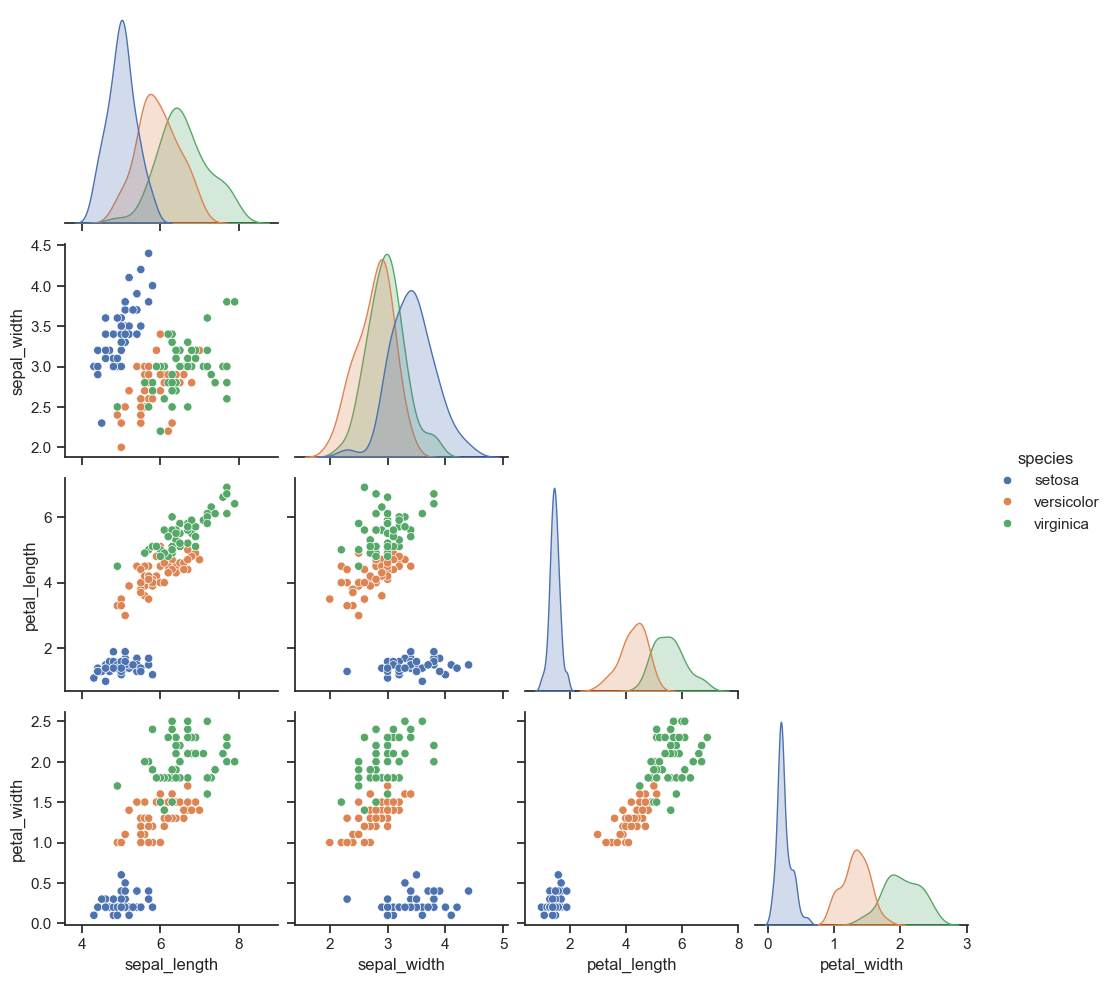

In [524]:
sns.pairplot(dfIris, hue="species", corner=True)

### Load stars QSOs

In [19]:
stars = pd.read_csv("data/SDSS_stars.csv")
QSOs = pd.read_csv("data/SDSS_QSO.dat", sep = "\s+", index_col = "SDSS")
stars["cat"] = "star"
stars["u-g"] = stars.u_mag - stars.g_mag
stars["g-r"] = stars.g_mag - stars.r_mag
stars["r-i"] = stars.r_mag - stars.i_mag
stars["i-z"] = stars.i_mag - stars.z_mag
QSOs["cat"] = "QSO"
QSOs["u-g"] = QSOs.u_mag - QSOs.g_mag
QSOs["g-r"] = QSOs.g_mag - QSOs.r_mag
QSOs["r-i"] = QSOs.r_mag - QSOs.i_mag
QSOs["i-z"] = QSOs.i_mag - QSOs.z_mag
sel_cols = ["u-g", "g-r", "r-i", "i-z", "cat"]
astrodata = pd.concat([stars[sel_cols], QSOs[sel_cols].sample(5000)])
astrodata_full = pd.concat([stars[sel_cols], QSOs[sel_cols]])
astrodata["cat"] = astrodata["cat"].astype("category")
astrodata_full["cat"] = astrodata_full["cat"].astype("category")

astrodata.sample(10)

u-g       g-r       r-i       i-z   cat
1336                0.941834  0.330885  0.084015  0.029506  star
43                  1.160832  0.265426  0.101902 -0.013980  star
080628.34+283818.1  0.341000  0.129000  0.207000  0.020000   QSO
2032                1.467030  0.508667  0.104956  0.109707  star
122901.82+642749.8  0.327000 -0.116000  0.206000  0.072000   QSO
3409                1.195852  0.285189  0.242866  0.026412  star
1381                1.169130  0.367939  0.146873  0.018669  star
1788                1.940394  0.683737  0.225903  0.109602  star
3096                2.489334  1.336656  0.784345  0.434558  star
677                 1.580368  0.699266  0.272693  0.145104  star

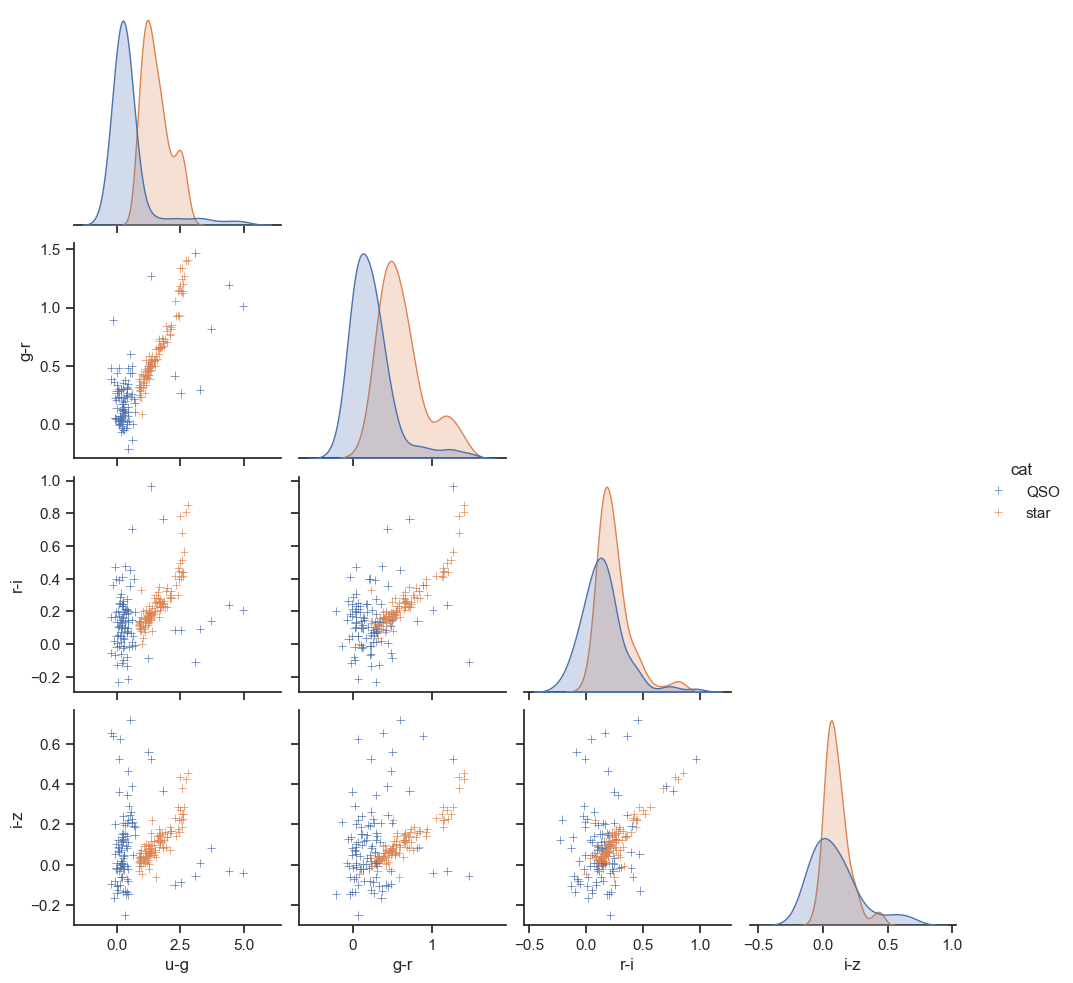

In [20]:
sns.pairplot(astrodata.sample(200), hue="cat", markers='+', corner=True)

### **Parallel coordinates**
Plot datapoints as lines (Each point is a line where the features are the x-values and the feature values are the y-values of the line). We can think of this like time series or a spectrum

**Question: The IRIS data have features for sepal_length and petal_length etc. Is there any difference between that and time or wavelength?**

<Axes: >

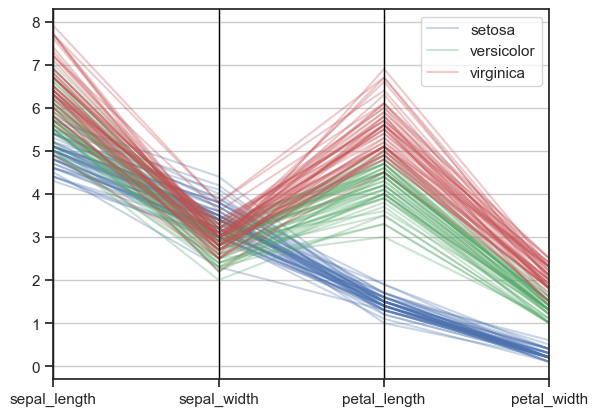

In [21]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(dfIris, 'species', color = ('b', 'g', 'r'), alpha = 0.3)

<Axes: >

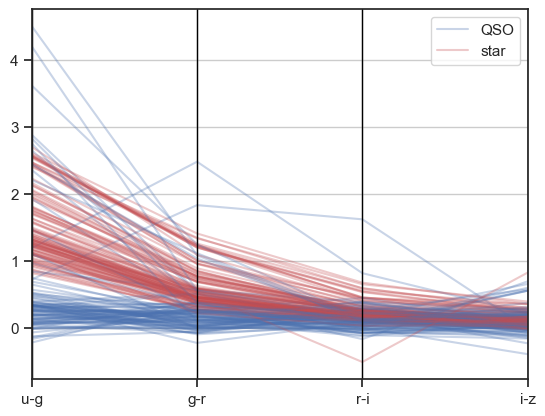

In [22]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(astrodata.sample(200), 'cat', color = ('b', 'r'), alpha = 0.3)

### **Andrews curves**

A smoothed version of a parallel coordinate plot.
Points are Fourier series

### $f_x(t) = \frac{x_1}{\sqrt{2}} + x_2 \sin(t) + x_3 \cos(t) + x_4 \sin(2 t) + x_5 \cos(2 t) + ...$

and are plotted between $-\pi < t < \pi$

Projection onto vector $ \left({\frac {1}{\sqrt {2}}},\sin(t),\cos(t),\sin(2t),\cos(2t),\ldots \right)$

<Axes: >

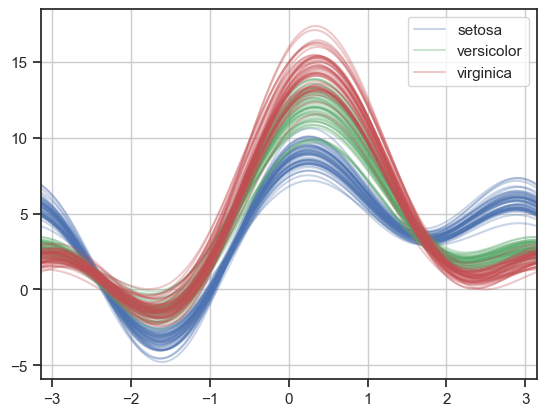

In [23]:
from pandas.plotting import andrews_curves
andrews_curves(dfIris, 'species', color = ('b', 'g', 'r'), alpha = 0.3)

<Axes: >

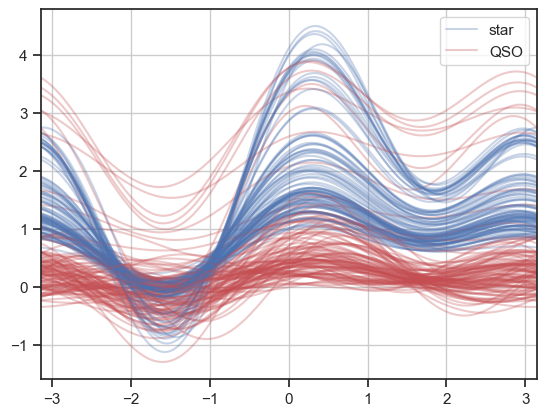

In [24]:
from pandas.plotting import andrews_curves
andrews_curves(astrodata.sample(200), 'cat', color = ('b', 'r'), alpha = 0.3)

### **RadViz (Radial Visualization)**

How RadViz works
- Anchor Points (Springs): Each feature in the dataset is assigned to a point around the circumference of the circle.

- Data Points (Springs Effect): Each data point is pulled towards the anchor points with a force proportional to the value of that feature. The location of the data point inside the circle is determined by the balance of these forces.

- Interpretation: Data points closer to a particular anchor (feature) are more influenced by that feature, meaning they have higher values for that feature. RadViz attempts to show the relationship between dimensions in this two-dimensional space.

Strengths of RadViz:

- Helps visualize relationships and clusters in high-dimensional data.
- Provides a compact view of multivariate relationships.
- Can show how points are influenced by multiple features at once.

Limitations of RadViz:

- Works best with datasets that have a manageable number of dimensions, as having too many features can overcrowd the visualization.
- Can sometimes obscure relationships due to the overlap of data points or non-linear relationships.

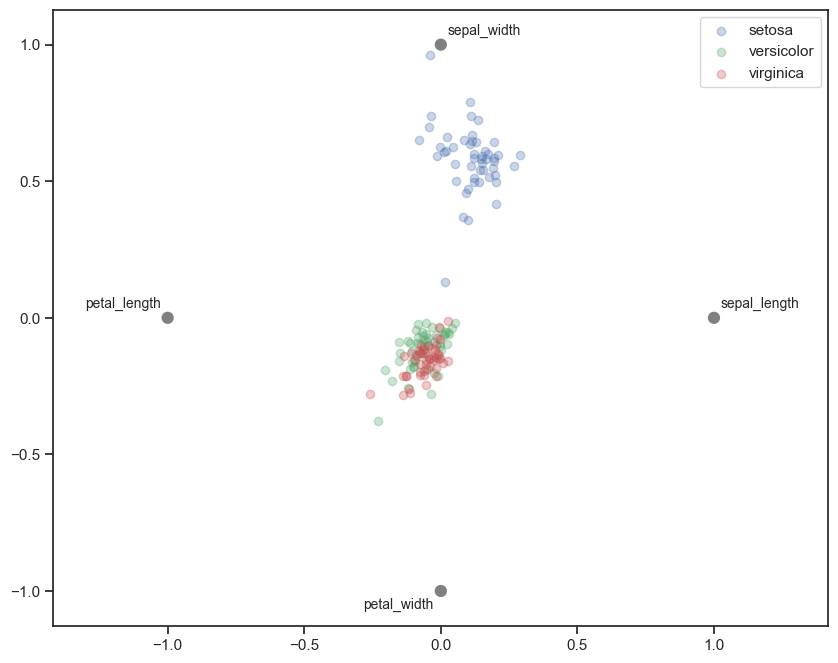

In [29]:
fig, ax = plt.subplots(figsize = (10, 8))
pd.plotting.radviz(dfIris, 'species', ax, color = ('b', 'g', 'r'), alpha = 0.3);
#note it does not separate green and red

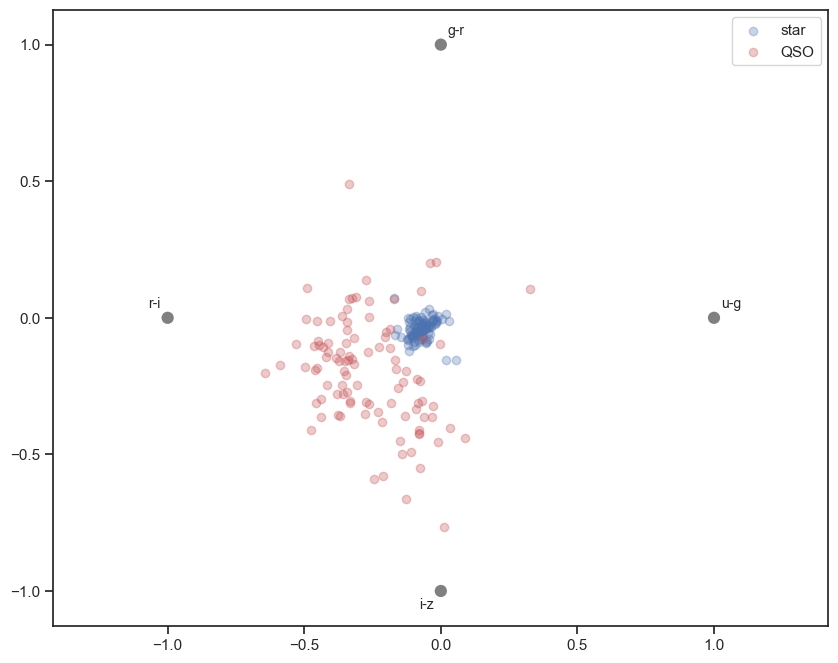

In [30]:
fig, ax = plt.subplots(figsize = (10, 8))
pd.plotting.radviz(astrodata.sample(200), 'cat', ax, color = ('b', 'r'), alpha = 0.3);

### Radar (or spider) plots

It allows you to visualize one or more variables across multiple categories, where each variable is represented as a spoke (axis) that radiates from the center of the plot. The values of each variable are plotted along these axes, and the points are connected to form a polygon. The values for each variable are scaled to a common range, typically from a minimum at the center of the plot to a maximum at the outer edge.

Strengths of Radar Plots:
- Easy comparison across several variables at once.
- Visually intuitive for showing how a single item or multiple items perform on various metrics.
- Works well when the variables are on the same or a similar scale.

Limitations of Radar Plots:
- Hard to interpret if there are too many variables or if multiple data series are plotted, as it can become cluttered.
- Not ideal for very large datasets or when variables have widely different scales.
- Can be misleading if not properly scaled, especially when the axes have different ranges.

Common Applications:
- Classifications of events
- Sports: To visualize and compare the performance of athletes across different skills.
- Market Research: To compare customer satisfaction or survey results across different categories.

Overall, radar plots are useful for comparing a small number of entities across multiple dimensions but may not be as effective with larger datasets or when variables differ greatly in magnitude.


![](images/radarplots.png)

https://towardsdatascience.com/plotting-in-many-dimensions-382fbd7fe76e

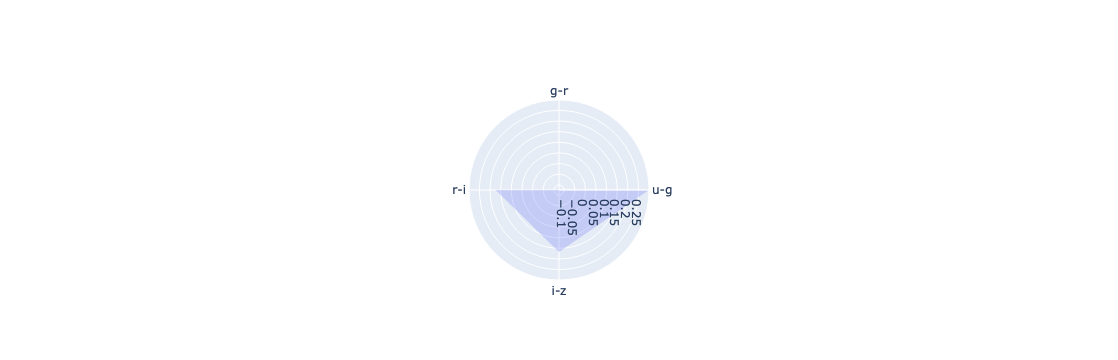

In [127]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
                    r=astrodata.loc[astrodata.cat=="QSO"].drop("cat", axis=1).iloc[10].values,
                    theta=astrodata.drop("cat", axis=1).columns,
                    mode='none', fill='toself', opacity=0.5
                    ))

fig.show()

### **Chernoff faces**

Represent each data point as a human face, where different facial features (such as the size of the eyes, the shape of the mouth, the length of the nose, etc.) are controlled by the values of the variables. This method was introduced by Herman Chernoff in 1973 as a way to use the human ability to recognize faces to interpret complex data intuitively.

**How it works**

Facial Features Represent Variables: Each facial feature is associated with a particular variable in the dataset. For example:
- The width of the face might represent one variable.
- The length of the nose another.
- The curvature of the mouth yet another.
- The size or spacing of the eyes could represent other variables.

Interpretation: Each data point in the dataset is converted into a face, with the variables dictating the shape and expression of the face. Similar data points will result in similar-looking faces, while very different data points will produce distinctly different faces. The human brain is particularly good at noticing subtle differences in facial expressions, which makes this visualization useful for spotting patterns or outliers.

Strengths of Chernoff Faces:
- Human Cognitive Advantage: The human brain is highly adept at recognizing and interpreting faces, making this method effective in detecting similarities and differences between data points.
- Multivariate Data: Chernoff faces allow for the simultaneous representation of multiple variables in a compact visual format.

Limitations of Chernoff Faces:
- Subjectivity: Interpretation of the faces can be subjective, and the choice of which variables map to which facial features can significantly impact the results.
- Limited Precision: While the method is good for recognizing general patterns or outliers, it is not very precise, and fine details of the data may be lost.
- Limited Variables: Only a limited number of variables can be effectively visualized (typically around 6–10), as more variables make the faces difficult to interpret.



![](images/chernoff.png)

### More information:
##### beautiful talk on visualization by Santiago Lombeyda here: http://astroinformatics2019.org/

# The curse of dimensionality & dimensionality reduction

## The Curse of Dimensionality

Let's say I want to buy a new laptop, and my criteria include (1) price, (2) weight, (3) screen size, (4) memory, and (5) disk space. If I gave laptops a low, medium, or high grade on each of these five **features**, then there are $3^5=243$ possible combinations of grades. If I want to feel like I've done a thorough search, I'll want to look at at least one laptop with each combination of grades, but that's a lot. Alternatively, if I pick a grade I want for each feature, then only $3^{-5} = 0.4\%$ of laptops will meet my criteria. If I add more criteria or a finer grained classification (e.g., unacceptable and ideal) both of these numbers will get exponentially worse.

But laptops are not uniformly distributed in the 5-dimensional space described by my criteria. Let's say I find two important patterns:
- laptops with larger screens tend to be heavier
- more expensive laptops tend to have more memory and disk space

Then I really only need to consider two criteria: (1) do I want a big, heavy laptop, or a small, light one and (2) do I want an expensive, high-performance laptop or a cheaper budget model?

Grading laptops on these 2 criteria gives me $3^2 = 9$ possible combinations, a much more managable number. I have just done **dimensionality reduction** and found that the **intrinsic dimensionality** of laptop specs is 2.

Now imagine we've done an astronomical survey where we've measured hundreds of things about millions of objects. Dimensionality reduction helps us understand the the patterns in the data we've collected. We want to find how our hundreds of measurements can be described by a few different populations of objects which have a few underlying physical parameters.

## Principal Component Analysis

Let's say this is a scatter plot of laptop weight vs screen size:

![scatter plot with PCA basis](images/PCAscatter.png)

There is a strong correlation between these two features that we'd like to describe. Instead of considering laptop weight and screen size separately, let's say I want to find the linear combination of the two features that best describes the data.

PCA does this by finding a new *basis* where the first basis vector is in the direction of maximum variance. This is equivalent to minimizing the sum of squared distances between data points and their projections onto the first basis vector:

![scatter plot with PCA projection](images/PCAprojection.png)

Let's look a bit at the mathematics of how PCA works. Let's say we have $N$ data points with $K$ features each, described by the $N\times K$ matrix $X$ where $X_{ij}$ is the $j^{\rm th}$ feature of the $i^{\rm th}$ data point, and that we've subtracted the mean value of each feature out. Consider the covariance matrix of the data:

$$C_X = \frac{1}{N-1} X^{T} X$$

The diagonal elements of the covariance matrix are the variance of the data for each feature (recall that the mean of each feature is now zero):

$$[C_X]_{jj} = \frac{1}{N-1} \sum_i [X^T]_{ji} X_{ij} = \frac{1}{N-1} \sum_i X_{ij} X_{ij} = \frac{1}{N-1} \sum_i X_{ij}^2$$

The sum of the diagonal elements of the covariance matrix is often called the **total variance**: you can think of it as adding together the variance of the data for all features. It turns out to be proportional to the sum of squared distances between each data point $X_i$ and the origin:

$${\rm total \, variance} = \sum_j [C_X]_{jj} = \frac{1}{N-1} \sum_j \sum_i X_{ij}^2 = \frac{1}{N-1} \sum_i \lVert X_i \rVert^2$$

Now we want to find the first PCA basis vector $r_1$ that is in the direction of maximum variance. Projecting all of the data onto $r_1$ would yield one number $Y_i$ for every data point:

$$Y_i = \sum_j X_{ij} [r_1]_j \Rightarrow Y = X r_1$$

Maximizing the variance means maximizing the sum of squares of this projection:

$$\sum_i Y_i^2 = Y^T Y = (X r_1)^T X r_1 = r_1^T X^T X r_1 = (N-1) r_1^T C_X r_1$$

It turns out that maximizing the variance while keeping the length of $r_1$ equal to 1 means that $r_1$ is the *eigenvector* of $C_X$ with the largest *eigenvalue* (the first principal component). The other eigenvectors, in decreasing order by their eigenvalues are the remaining principal components. So we can reduce the dimensionality of $X$ by projecting it onto the first few principal components.

Why is maximizing the variance of the projection equivalent to minimizing the sum of squared distances between the data and their projections? The squared distance of a data point to the origin is its contribution to the total variance: the sum of the diagonal elements of $C_X = X^T X$. The squared length of a data point's projection is its contribution to the remaining variance after projection, $Y^T Y$. By the Pythagorean theorem, the difference between these two is the squared distance between the data point and its projection (or the data point's contribution to the lost variance). Thus, maximizing the variance of the projection is equivalent to mimimizing the sum of squared distances between the data points and their projections.

![PCA variance and MSE](images/PCAvariance.png)
(from [Alex William's blog post](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/))

Why is this interesting? Let's say we modeled the data $X$ as being linear combinations of $M$ unknown basis vectors $R$, with some Gaussian noise with constant variance $\sigma^2$ added. The best fit linear combination of vectors to any data point will be that data point's projection onto those vectors. Then the log likelihood for some set of basis vectors $R$ will be proportional to the sum of squared distances between the data X and their projection onto $R$:

$$\log L(R) = -\frac{1}{2\sigma^2} \sum_i \lVert X_i - X_i R\rVert^2 + {\rm const}$$

So by maximizing the variance of the projection, the first $M$ principal components also maximize the likelihood under this model. That is, PCA is a maximum likelihood method for describing your data as a linear combination of vectors (with constant noise in all dimensions). This allows us to modify PCA for different situations - non-negative matrix factorization assumes that the basis vectors and their linear coefficients are non-negative, while [heteroscedastic matrix factorization](https://ui.adsabs.harvard.edu/abs/2012ApJ...753..122T/abstract) allows the uncertainty $\sigma$ to be different for different features.

![](images/PCAAnimation.gif)

Let's create our data matrix X (also called the design matrix)

In [569]:
astroX = np.array(astrodata.drop(columns = ['cat']))
astroX_full = np.array(astrodata_full.drop(columns = ['cat']))
cats = astrodata['cat']
cats_full = astrodata_full['cat']

## Data Scaling

**Question: why might how we scale our data  be important for PCA analyses? Think about our laptop data set and what we are measuring**

<details>
  <summary>Click to expand</summary>

We can see (particularly for data where the units are different) that how we scale the data (e.g, whether we choose meters or millimeters) can impact the scatter in the data points. If one axis is in kg and the other in cm it is not obvious how we would relate one axis to the other. PCA is assuming some form of distance in a high dimensional space. 

</details>


Some options are:

- Standard Scaling: 

    Subtract by the mean and divide by the standard deviation (data are centered on zero and have unit variance). **This is the most common scaling approach**
    
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
    
    
- Robust Scaling: 

    Subtract the median and divide by the interquartile range. 
    
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html


- Quantile Transformer:

    Transform the data into quantiles, either to follow a uniform or normal distribution.
    
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.quantile_transform.html


- Power Transformer:

    Transform the data to change the skewness of the distribution per feature and make them more normal.
    
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.power_transform.html

In [570]:
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

scaler = StandardScaler()
scaler.fit(astroX)
astroX = scaler.transform(astroX)

scaler_full = StandardScaler()
scaler_full.fit(astroX_full)
astroX_full = scaler.transform(astroX_full)

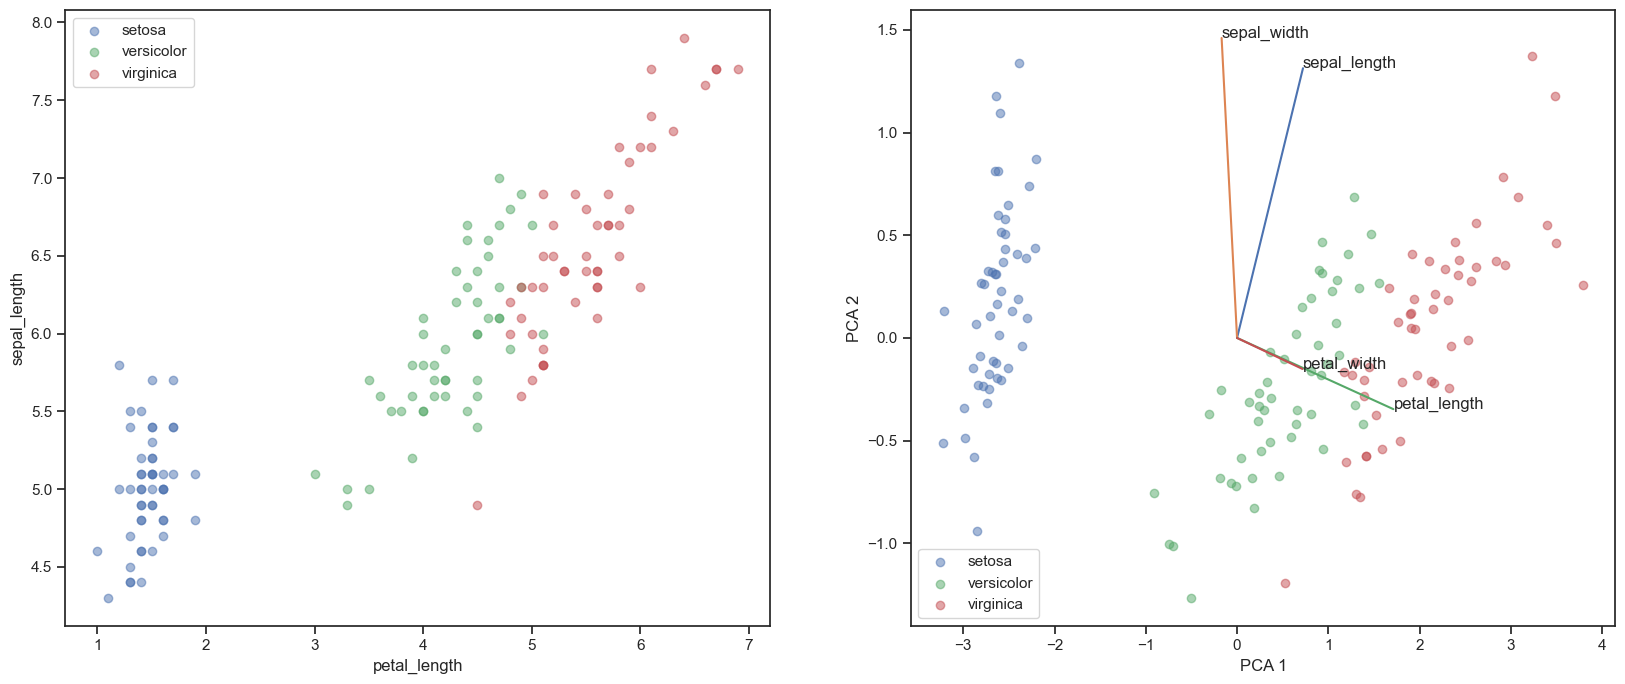

In [571]:
from sklearn import decomposition

iris = np.array(dfIris.drop(columns = ['species']))
species = dfIris['species']
iris_colors = {'setosa': 'b', 'versicolor': 'g', 'virginica': 'r'}

# Specify the PCA number of components and fit the data
pca = decomposition.PCA(n_components=2) # this keeps 2 components
pca.fit(iris)
# project the data onto the PCA vectors
iris_pca = pca.transform(iris)

# projected coordinates
fig, ax = plt.subplots(figsize = (20, 8), nrows=1, ncols=2,)

for specie in np.unique(species):
    mask = (species == specie)
    ax[0].scatter(dfIris[mask]['petal_length'], dfIris[mask]['sepal_length'], label = specie, c = iris_colors[specie], alpha = 0.5)
ax[0].set_xlabel("petal_length")
ax[0].set_ylabel("sepal_length")
ax[0].legend();

for specie in np.unique(species):
    mask = (species == specie)
    ax[1].scatter(iris_pca[mask][:, 0], iris_pca[mask][:, 1], label = specie, c = iris_colors[specie], alpha = 0.5)

# loading vectors
eviris = 2. * pca.components_
for idx, var in enumerate(dfIris.columns[:-1]):
    ax[1].plot([0, eviris[0, idx]], [0, eviris[1, idx]])
    ax[1].text(eviris[0, idx], eviris[1, idx], var)
ax[1].set_xlabel("PCA 1")
ax[1].set_ylabel("PCA 2")
ax[1].legend();

In [572]:
# which features dominate 
print (dfIris.columns[:-1].values)
print (pca.components_[0])
print (pca.components_[1],'\n')



# How important is each PC (interms of the explained variance)
print (pca.explained_variance_)

['sepal_length' 'sepal_width' 'petal_length' 'petal_width']
[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
[ 0.65658877  0.73016143 -0.17337266 -0.07548102] 

[4.22824171 0.24267075]


### PCA with astrophysical data, the stars and QSO data sets

In [573]:
from sklearn import decomposition
astro_colors = {'star': 'r', 'QSO': 'b'}

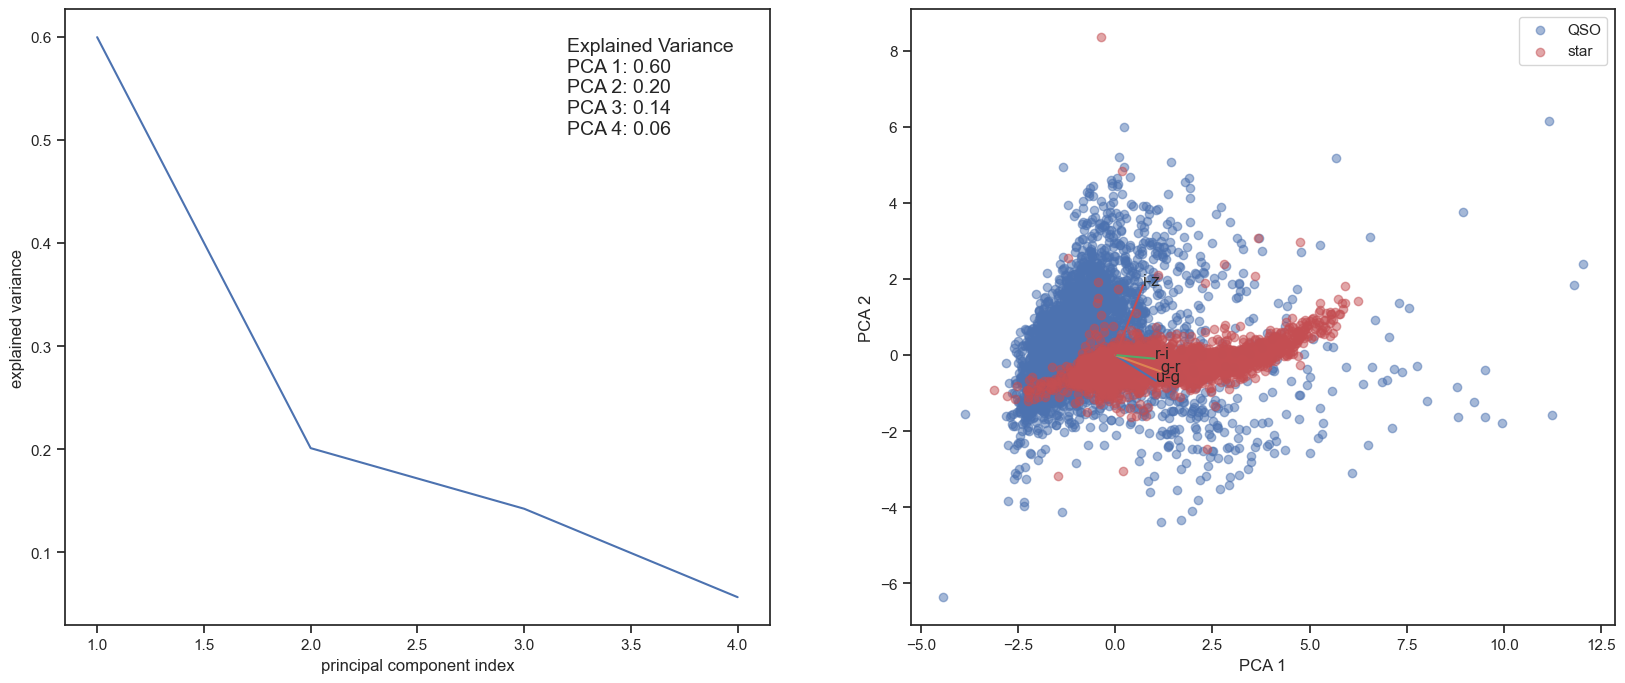

In [574]:
#define the PCA
n_components=4
pca = decomposition.PCA(n_components)
pca.fit(astroX)
astro_pca = pca.transform(astroX)

# projected coordinates
fig, ax = plt.subplots(figsize = (20, 8), nrows=1, ncols=2)

# explained variance coordinates
ax[0].plot(range(1, n_components+1), pca.explained_variance_ratio_)
ax[0].set_xlabel('principal component index')
ax[0].set_ylabel('explained variance')

labels = [f"PCA {i+1}: {num:.2f}" for i, num in enumerate(pca.explained_variance_ratio_)]

# Combine the labels into a single string with newlines
label_text = "Explained Variance \n" + "\n".join(labels)
ax[0].text(3.2, 0.6, label_text, fontsize=14, verticalalignment='top', horizontalalignment='left')  

for cat in np.unique(cats):
    mask = (cat == cats)
    ax[1].scatter(astro_pca[mask][:, 0], astro_pca[mask][:, 1], label = cat, c = astro_colors[cat], alpha = 0.5)

# loading vectors
evastro = 2. * pca.components_
for idx, var in enumerate(astrodata.columns[:-1]):
    ax[1].plot([0, evastro[0, idx]], [0, evastro[1, idx]])
    ax[1].text(evastro[0, idx], evastro[1, idx], var)
ax[1].set_xlabel("PCA 1")
ax[1].set_ylabel("PCA 2")
ax[1].legend();

We can see that the first three components are the most important, explaining 60%, 20% and 15% of the variance in the dataset, respectively, and the variance explained by the next component falls off quickly with the number of principal components.

We can transform our data into the PCA basis, and then reduce the dimensionality by keeping only the first few principal components. 

**Question: How do we choose how many components to keep?**


<details>
  <summary>Click to expand</summary>

  There are many ways to choosing a number of principal components to use. One way is to look for a knee in the "scree" plot. Another is to pick a fraction of the variance we want explained (like 95%).
  
</details>

## Non negative Matrix Factorization (NMF)

In PCA eigenvectors are defined relative to a mean data vector. Principal components can, therefore, be positive or negative but for many physical systems we know data are a linear sum of positive components (e.g. a galaxy spectrum is a linear sum of stellar components).

Nonnegative matrix factorization (NMF) applies positivity constraints. It assumes that the data matrix, $V$, is a product of two positive matrices, $V=W*H$, which are solved for iteratively and by minimizing the reconstruction error, $||(V - WH)^2||$

We want to decompose a positive valued data matrix as the product of two positive valued matrices

![](images/NMF.png)

**$V \in \mathbb{R}^{MxN}$**. Positive data matrix. It contains N samples and M dimensions (data points are columns).

**$W \in \mathbb{R}^{MxK}$**. Positive dictionaries matrix. Columns are the basis vectors or **prototypes**.

**$H \in \mathbb{R}^{KxN}$**. Positive coefficients matrix.

sometimes this is written as $V^T = H^T W^T$. It depends on how you present the data to the method.


This is achieved by minimizing the error function

$\Large \min\limits_{W,H}^{} || V - W H ||^2_F + \lambda ||H||_1,~~~~ s.t.~~~ W \ge 0, H \ge 0$

Note that $v_i = W h_i$, where $v_i$ is the i-th column vector of **V** and $h_i$ is the i-th column vector of **H**

/Users/ajc/miniconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



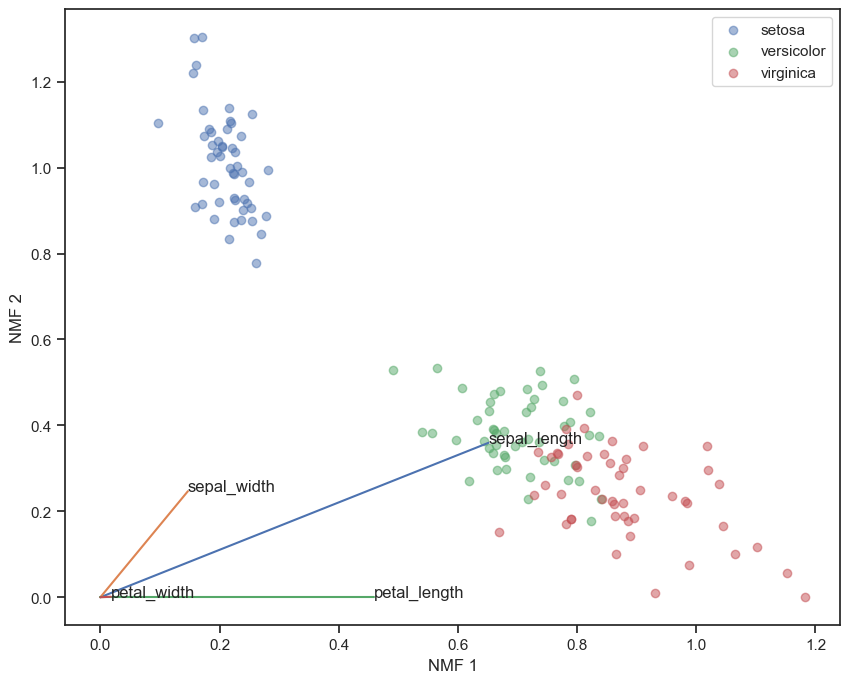

In [575]:
from sklearn import decomposition

#define decomposition
nmf = decomposition.NMF(n_components=4, max_iter=1000)

#fit decomposition
nmf.fit(iris)
iris_nmf = nmf.transform(iris)

# projected coordinates
fig, ax = plt.subplots(figsize = (10, 8))
for specie in np.unique(species):
    mask = (species == specie)
    ax.scatter(iris_nmf[mask][:, 0], iris_nmf[mask][:, 1], label = specie, c = iris_colors[specie], alpha = 0.5)

# loading vectors
basis = 0.1 * nmf.components_
for idx, var in enumerate(dfIris.columns[:-1]):
    ax.plot([0, basis[0, idx]], [0, basis[1, idx]])
    ax.text(basis[0, idx], basis[1, idx], var)

ax.set_xlabel("NMF 1")
ax.set_ylabel("NMF 2")
ax.legend(loc = 1);

In [576]:
#compare the vectors
#note the PCA vectors can be negative
print (pca.components_)
print ()
print (nmf.components_)

[[ 0.52332112  0.58559224  0.50537294  0.35751214]
 [-0.33731302 -0.21669224 -0.04685034  0.91491499]
 [-0.57311704 -0.06166292  0.79589899 -0.1851468 ]
 [-0.53281496  0.77866802 -0.33007278 -0.02891867]]

[[6.51308619e+00 1.46940631e+00 4.59464543e+00 1.75379211e-01]
 [3.59467729e+00 2.46900528e+00 0.00000000e+00 1.14094233e-02]
 [0.00000000e+00 1.31865541e+01 8.97295650e+00 7.30910109e-01]
 [0.00000000e+00 0.00000000e+00 1.88780064e+00 4.39585968e+00]]


In [577]:
from sklearn.metrics import explained_variance_score
def get_score(model, data, scorer=explained_variance_score):
    """ Estimate performance of the model on the data """
    prediction = model.inverse_transform(model.transform(data))
    return scorer(data, prediction)

ks = [2,3,4]
perfs_train = []
for k in ks:
    nmf = decomposition.NMF(n_components=k, max_iter=10000).fit(iris)
    perfs_train.append(get_score(nmf, iris))
print("NMF",perfs_train)
print("PCA", pca.explained_variance_ratio_.cumsum()[1:])

NMF [0.9240678783570055, 0.989689181645836, 0.9999997235799558]
PCA [0.80098481 0.94337934 1.        ]


/Users/ajc/miniconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).

/Users/ajc/miniconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).

/Users/ajc/miniconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



## MNIST dataset

1797 handwritten digits, 8x8 images

In [578]:
from sklearn import datasets

digits = datasets.load_digits(n_class = 10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_samples, n_features

(1797, 64)

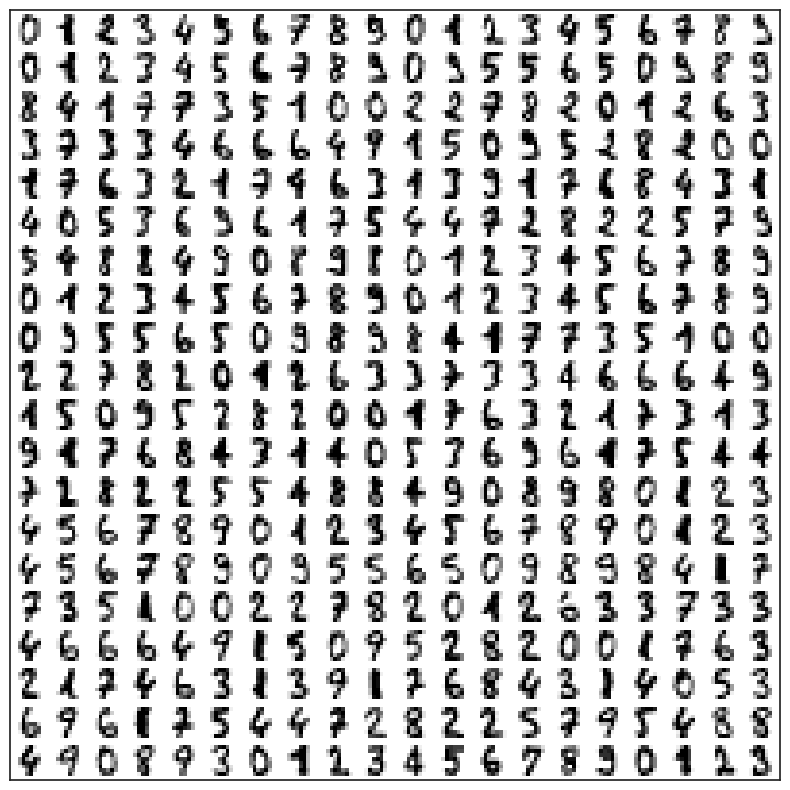

In [579]:
nrows = 20
fig, ax = plt.subplots(figsize = (10, 10))
img = np.zeros((10 * nrows, 10 * nrows))
for i in range(nrows):
    ix = 10 * i + 1
    for j in range(nrows):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * nrows + j].reshape((8, 8))
ax.imshow(img, plt.cm.binary)
plt.xticks([])
plt.yticks([]);

### MNIST + PCA

Code from http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

In [580]:
from matplotlib import offsetbox

# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize = (10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    shown_images = np.array([[1., 1.]])  # just something big
    for i in range(digits.data.shape[0]):
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.r_[shown_images, [X[i]]]
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
            X[i])
        ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [581]:
ndim = 10
pca_model = decomposition.PCA(n_components = ndim)
pca_model.fit(X)
mnist_pca = pca_model.transform(X)

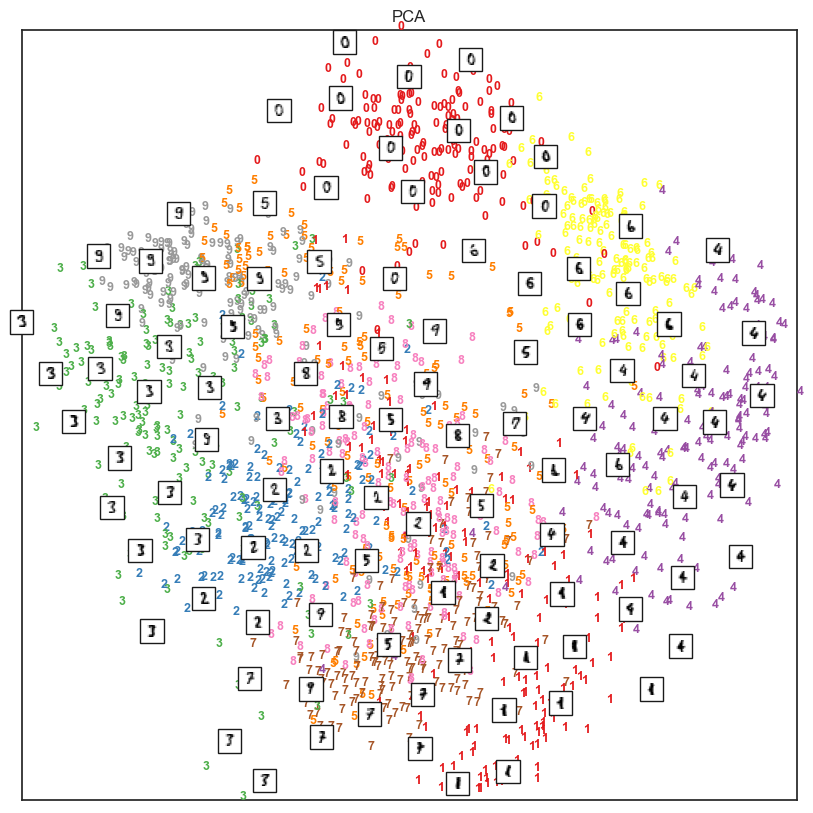

In [582]:
plot_embedding(mnist_pca[:,:2], "PCA")
plt.show()

**Eigenvectors**

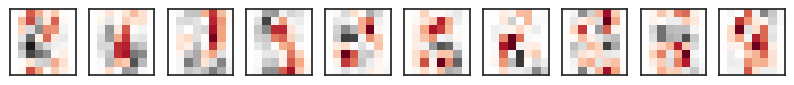

In [583]:
from matplotlib import colors

evPCA = pca_model.components_
maxabs = np.max(evPCA.flatten())

fig, ax = plt.subplots(ncols = ndim, figsize = (10, 10))
# use divergent color scale, red is negative, gray is positive, white is zero
cmap = plt.cm.RdGy
norm = colors.Normalize(vmin = -maxabs, vmax = maxabs)
for i in range(ndim):
    im = evPCA[i].reshape((8, 8))
    ax[i].imshow(im, cmap = cmap, norm = norm)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

### MNIST + NMF

In [584]:
ndim = 2
nmf_model = decomposition.NMF(n_components = ndim, max_iter=1000)
nmf_model.fit(X)
mnist_nmf = nmf_model.transform(X)

/Users/ajc/miniconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



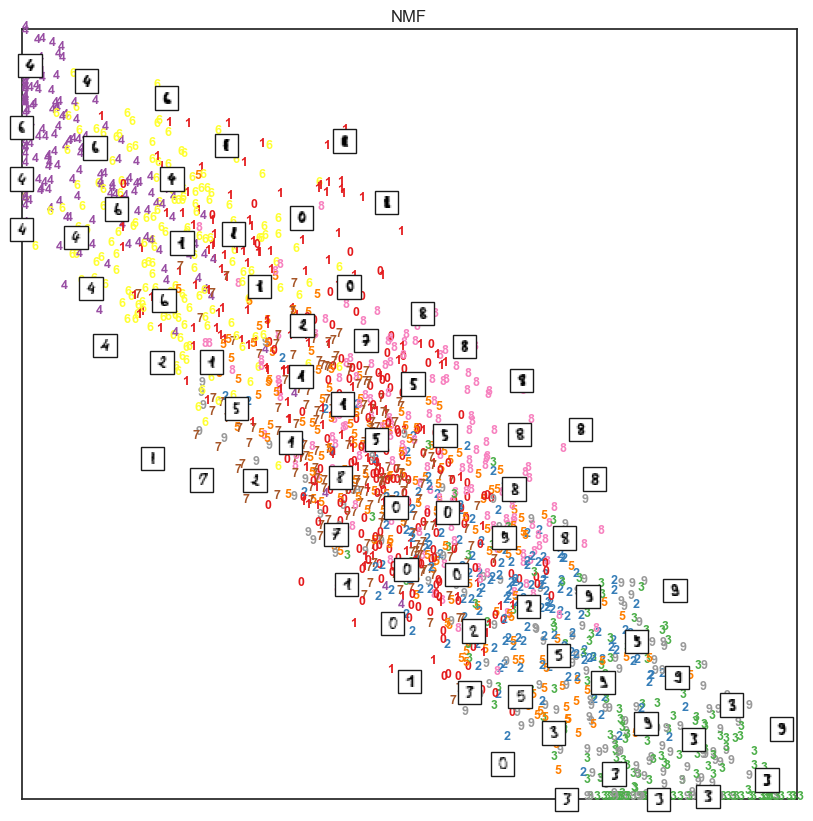

In [585]:
plot_embedding(mnist_nmf, "NMF")
plt.show()

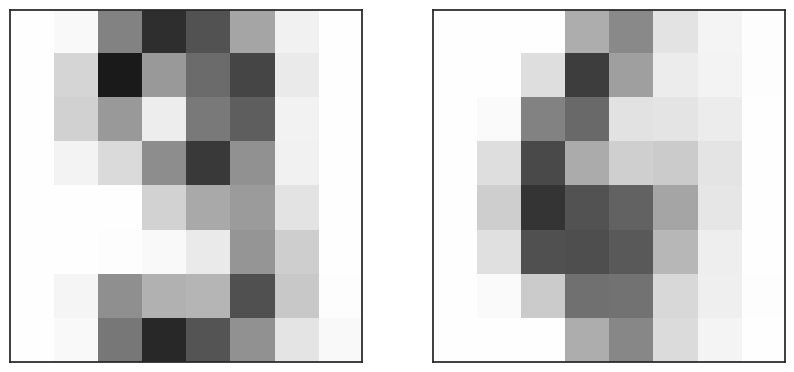

In [586]:
evNMF = nmf_model.components_
maxabs = np.max(evNMF.flatten())

fig, ax = plt.subplots(ncols = ndim, figsize = (10, 10))
# use divergent color scale, red is negative, gray is positive, white is zero
cmap = plt.cm.RdGy
norm = colors.Normalize(vmin = -maxabs, vmax = maxabs)
for i in range(ndim):
    im = evNMF[i].reshape((8, 8))
    ax[i].imshow(im, cmap = cmap, norm = norm)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

## Families of dimensionality reduction methods

### Matrix factorization:

    * Principal Component Analysis
    * Linear Autoencoder
    * Latent Dirichlet Allocation
    * Non-negative matrix factorization
    * Generalized Low Rank Models
    * Word2Vec

### Neighbour graphs:

    * Laplacian Eigenmaps
    * Hessian Eigenmaps
    * Local Tangent Space Alignment
    * Isomap
    * t-SNE
    * Local linear Embedding
    * UMAP

## Manifold Learning <a id='LLE'></a>

Real-world data sets often have very nonlinear features (e.g. QSOs with broad lines) which are hard to describe compactly using linear eigenvectors. Manifold learning techniques search for a representation of these data within a lower dimensional space

<img src="http://www.astroml.org/_images/fig_S_manifold_PCA_1.png"></img>

**Questions - what do you expect the PCA directions to be for a rolled up piece of paper**

### Locally Linear Embedding (LLE)

* Non-linear dimensionality reduction method.

* It tries to find a lower-dimensional embedding which preserves **local** distances between points

**Algorithm:**

*Step 1: Define the local geometry*

1. Find K nearest neighbors per data point
2. Build local linear model around reference point, minimizing reconstruction error:

\begin{equation}
  \Large \epsilon(W) = \sum_i \large| \vec{X_i} - \sum_j W_{ij} \vec{X_j} \large|^2
\end{equation}

\begin{equation}
  s.t. \sum_j W_{ij} = 1
\end{equation}

essentially this is finding the hyperplane that describes the local surface at each point within the data set. 

*Step 2: embed within a lower dimensional space*

 
1. Set all $W_{ij}=0$ except when point $j$ is one of the $k$ nearest neighbors of point $i$. $W$ becomes very sparse for $k \ll N$ 
2. Reconstruct neighborhood in a new lower dimensional space $d$ is the new dimensionality), with new errors 
\begin{equation}    
    \Large \phi(Y) = \sum_i | \vec{Y_i} - \sum_j W_{ij} \vec{Y_j}|^2
\end{equation}
where now we solve for the values of $\vec{Y_i}$. This requires an eigenvalue decomposition of the matrix $C_W \equiv (I-W)^T(I-W)$, as we solve for $(I−W)^T(I−W)Y=λY$ (with $\lambda$ the eigenvalues and $Y$ the eigenvectors). Youiscard the eigenvector associated with the smallest eigenvalue (which corresponds to trivial solutions).

LLE has been applied to data as diverse as galaxy spectra, stellar spectra, and photometric light curves.

**Question: How do you choose the number of nearest neighbors?**

[Survey of LLE variants](https://arxiv.org/pdf/2011.10925.pdf)

In [587]:
from sklearn import datasets
from sklearn.manifold import LocallyLinearEmbedding as LLE

n_points = 1000
S, color = datasets.make_s_curve(n_points, random_state=0)

Y = LLE(n_components = 2, n_neighbors = 12).fit_transform(S)

pca_model = decomposition.PCA(n_components = 3)
pca_model.fit(S)
pca_projection = pca_model.transform(S)

Text(0.5, 0.92, 'PCA')

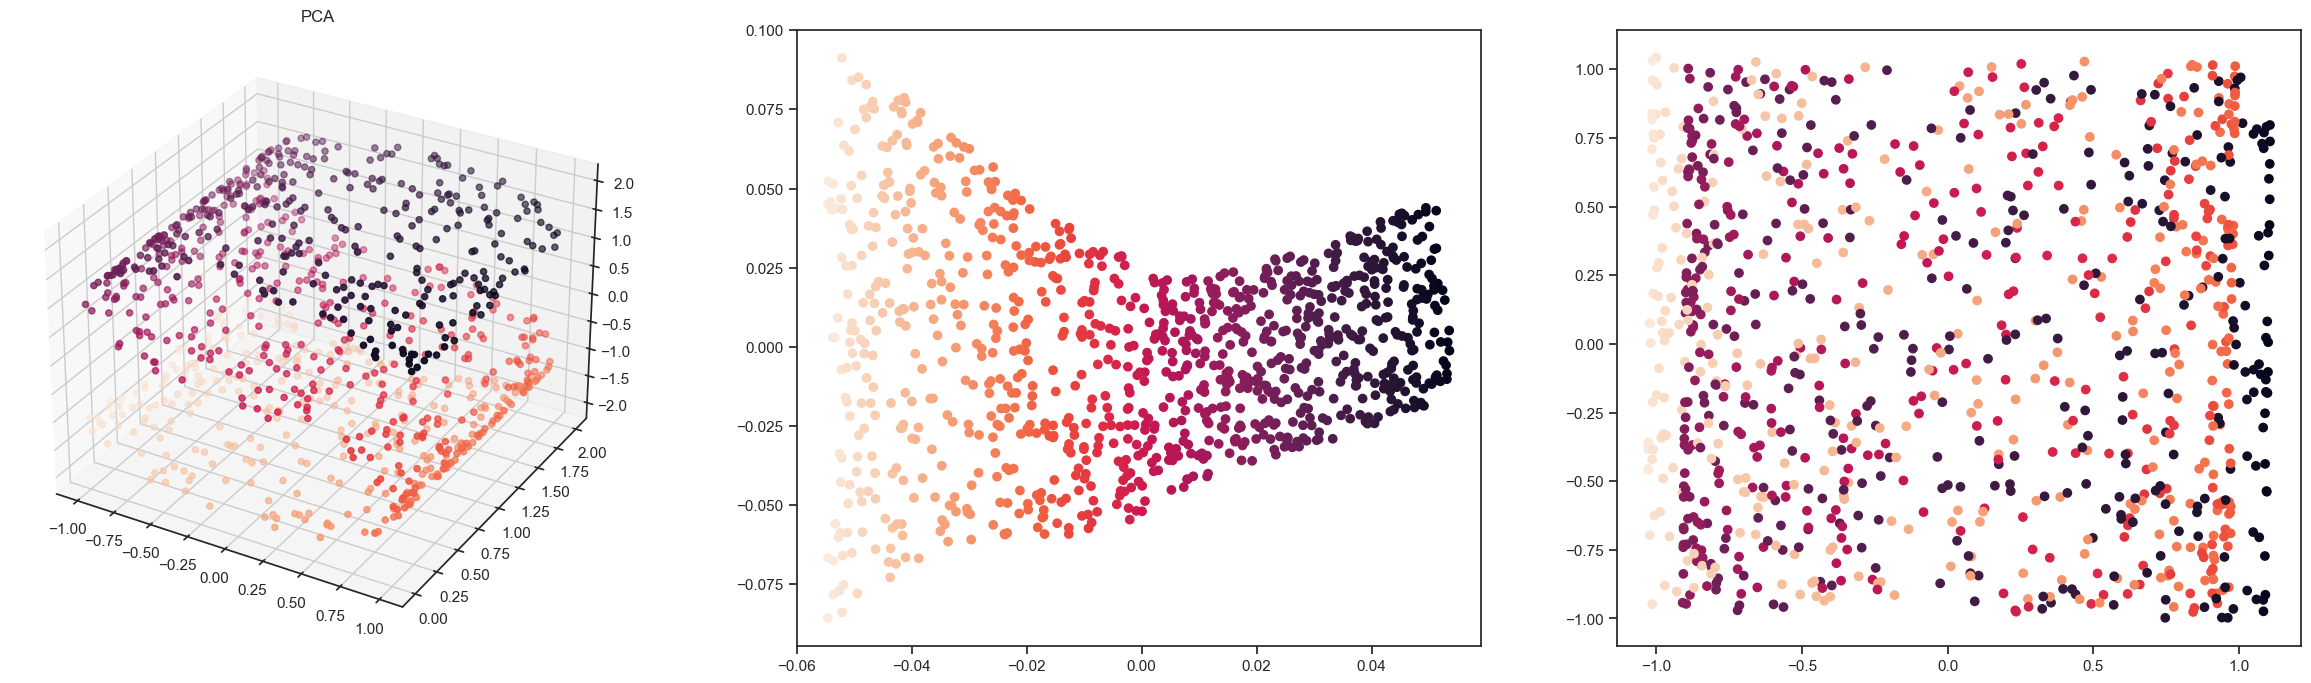

In [588]:
# projected coordinates
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize = (30, 8))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(S[:, 0], S[:, 1], zs=S[:, 2], c = color, )
ax1.set_title("3D data")

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(Y[:, 0], Y[:, 1], c = color)
ax1.set_title("LLE")

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(pca_projection[:, 1], pca_projection[:, 2], c = color)
ax1.set_title("PCA")


Text(0.5, 1.0, 'PCA')

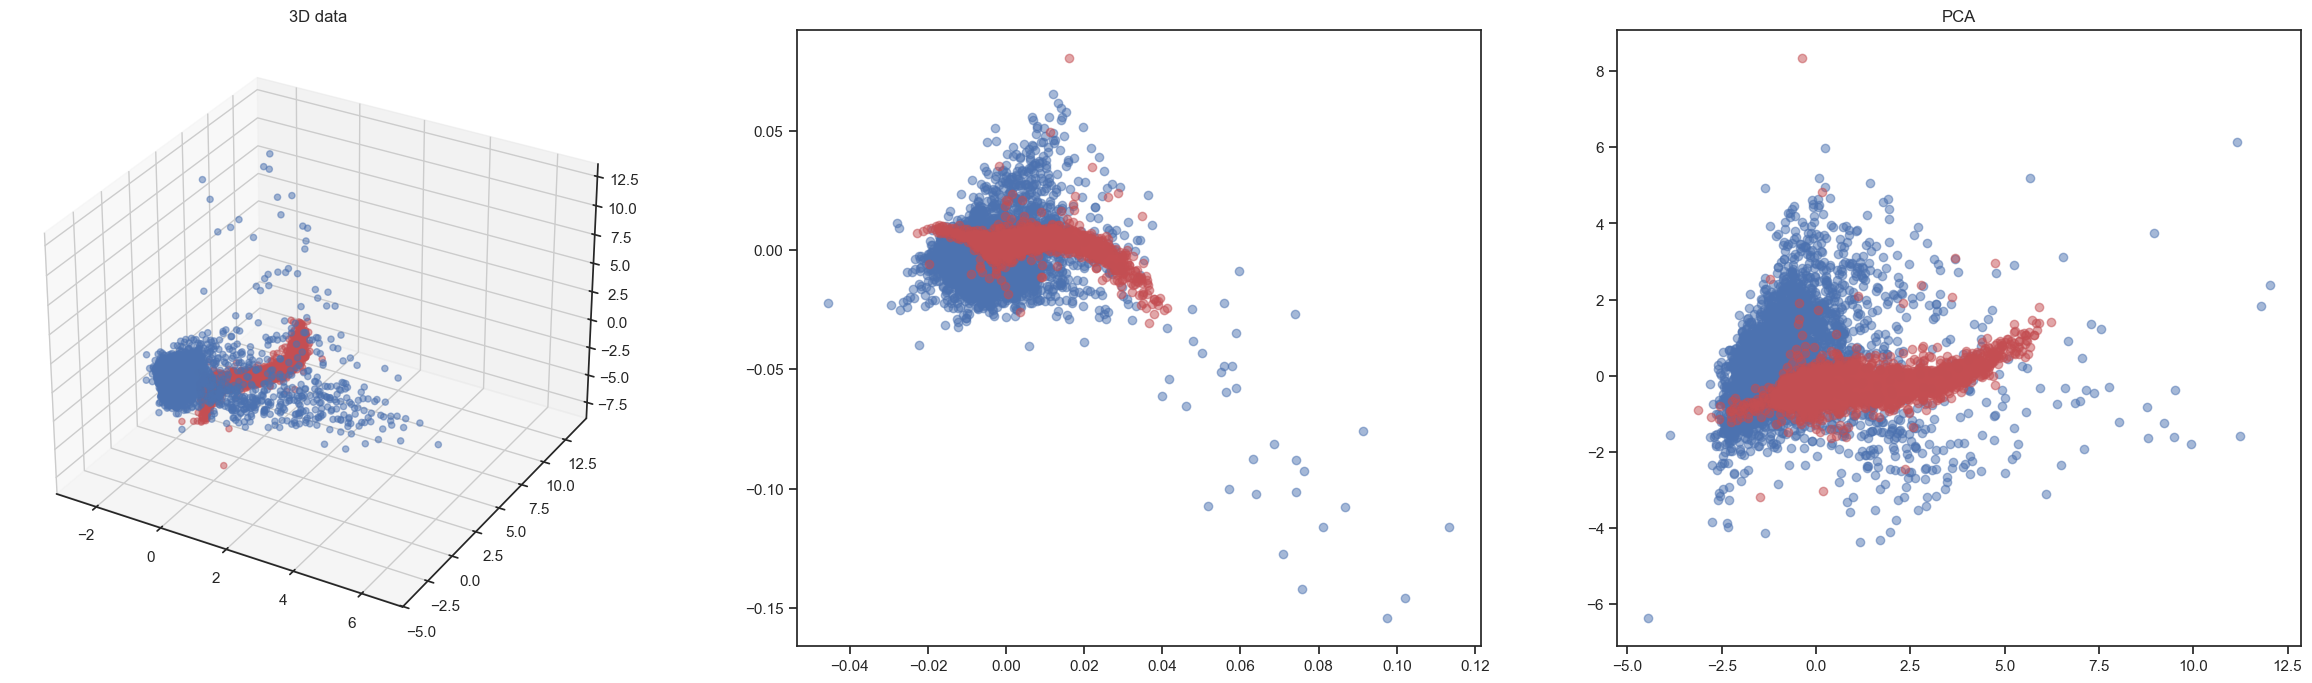

In [592]:
LLE_model = LLE(n_components = 3, n_neighbors = 20)
astro_LLE = LLE_model.fit_transform(astroX)

astro_pca_model = decomposition.PCA(n_components = 3)
astro_pca_model.fit(astroX)
astro_pca_projection = astro_pca_model.transform(astroX)

fig = plt.figure(figsize = (30, 8))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
for cat in np.unique(cats):
    mask = (cats == cat)
    ax1.scatter(astroX[mask][:, 0], astroX[mask][:, 1], zs=astroX[mask][:, 2], label = cat, c = astro_colors[cat], alpha = 0.5)
ax1.set_title("3D data")

ax2 = fig.add_subplot(1, 3, 2)
for cat in np.unique(cats):
    mask = (cats == cat)
    ax2.scatter(astro_LLE[mask][:, 0], astro_LLE[mask][:, 1], label = cat, c = astro_colors[cat], alpha = 0.5)
ax3.set_title("LLE")

ax3 = fig.add_subplot(1, 3, 3)
for cat in np.unique(cats):
    mask = (cats == cat)
    ax3.scatter(astro_pca_projection[mask][:, 0], astro_pca_projection[mask][:, 1], label = cat, c = astro_colors[cat], alpha = 0.5)
ax3.set_title("PCA")


## There are many other embedding techniques

### Isometric Mapping (Isomap)

* Non-linear dimensionality reduction method.

* It tries to find a lower-dimensional embedding which preserves distances between all points

*Algorithm*

1. Find k nearest neighbors per point, represent the points by a weighted graph
2. Compute all pairs of shortest paths on the above neighborhood graph
3. apply **multidimensional scaling** using the matrix of shortest-path distances

**Mutidimensional scaling**:

1. Assign points to arbitrary coordinates in p-dimensional space.
2. Compute euclidean distances among all pairs of points, to form a $\hat D$ matrix.
3. Compare the $\hat D$ matrix with the input $D$ matrix by evaluating the **stress** function. The smaller the value, the greater the correspondance between the two.
4. Adjust coordinates of each point in the direction that reduces stress.
5. Repeat steps 2 through 4 until stress won't get any lower. 

**Stress function**

An example of stress function is the following:

$\Large {Stress}_D(x_1, x_2, ..., x_N) = \biggl(\frac{\sum\limits_{i \ne j = 1,..N} (d_{ij} - ||x_i - x_j||^2)}{\sum_{ij} d^2_{ij}}\biggr)^{1/2}$

https://en.wikipedia.org/wiki/Multidimensional_scaling



In [593]:
from sklearn.manifold import Isomap
Y = Isomap(n_components=2).fit_transform(S)

Text(0.5, 0.92, 'Isomap')

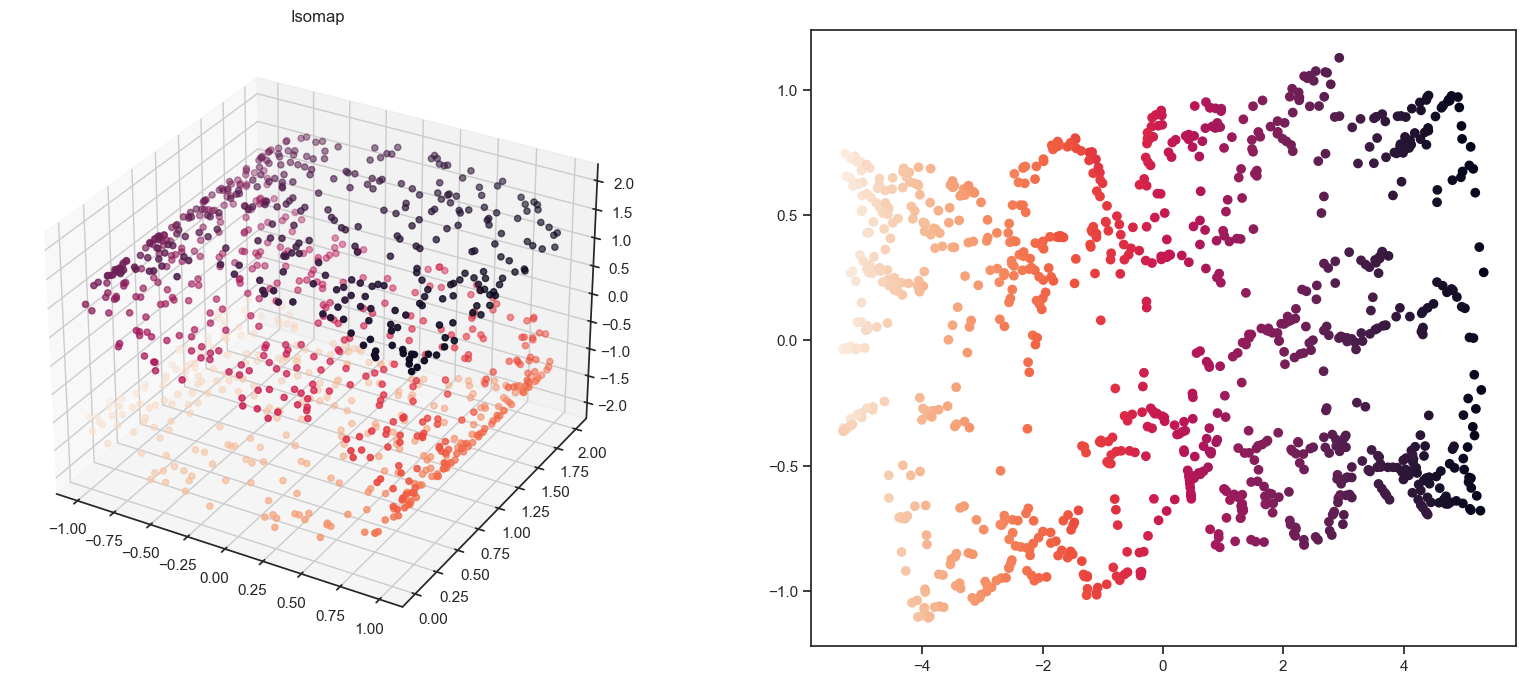

In [594]:
fig = plt.figure(figsize = (20, 8))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(S[:, 0], S[:, 1], zs=S[:, 2], c = color, )
ax1.set_title("3D data")

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(Y[:, 0], Y[:, 1], c = color)
ax1.set_title("Isomap")


### t-distributed Stochastic Neighbor Embedding (t-SNE)

The goal of t-SNE is to reduce the dimensionality of a dataset while preserving the local structure of the data (i.e., how points relate to their neighbors). It tries to ensure that points that are close together in the high-dimensional space remain close in the low-dimensional space, and points that are far apart remain far apart.

- Visualize high-dimensional data by giving each datapoint a location in a two or three-dimensional map.
- Variation of Stochastic Neighbor Embedding (**Hinton** & Roweis, 2002), faster and without crowding of points at the center of map 

##### SNE (Hinton & Roweis, 2002):

* **Convert high-dimensional dataset $X={x_1, ..., x_n}$ into two or three dimensional dataset $Y={y_1, ..., y_n}$ to be displayed as a scatter plot.**

* Start by converting high-dimensional Euclidean distances between datapoints into conditional probabilities $p_{j|i}$. 

* $p_{j|i}$ is the probability of picking $x_j$ as its neighbor if picked from a Gaussian centered at $x_i$.

$\Large p_{j|i} = \frac{\exp(-||x_i - x_j||^2 / 2 \sigma_i^2)}{\sum_{k \ne i} \exp(-||x_i - x_k||^2 / 2 \sigma_i^2)}$

* Do the same for the low-dimensional counterparts (assume $\sigma_i = 1/\sqrt{2}$ for convenience):

$\Large q_{j|i} = \frac{\exp(-||y_i - y_j||^2)}{\sum_{k \ne i} \exp(-||y_i - y_k||^2)}$

* If the map points $y_i$ and $y_j$ correctly model the similarity between the high-dimensional datapoints $x_i$ and $x_j$, **the conditional probabilities $p_{j|i}$ and $q_{j|i}$ will be equal**.

* t-SNE tries to minimize the difference between the probability distributions in the high-dimensional and low-dimensional spaces using a cost function called Kullback-Leibler (KL) divergence between $P$ and $Q$ as the cost function! KL measures  how well $Q$ approximates $P$, not the other way around.

**Kullback-Leibler distance (relative entropy)**:

$\Large D_{KL}(P||Q) = \sum_i P(i) \ln \frac{P(i)}{Q(i)}$

* The cost function would then be:

$\Large C = \sum_i KL(P_i || Q_i) = \sum_i \sum_j p_{j|i} \ln \frac{p_{j|i}}{q_{j|i}}$

This measures how much information is lost when moving from the high-dimensional space to the low-dimensional space.

![](images/KL.png)

The previous assumptions make the cost function very simple:


$\Large C = \sum_i KL(P_i || Q_i) = \sum_i \sum_j p_{j|i} \log \frac{p_{j|i}}{q_{j|i}}$

To minimize the KL divergence, t-SNE uses gradient descent. The positions of the points in the low-dimensional space are iteratively adjusted so that the probabilities $q_{ij}$ $q_{ij}$ in the low-dimensional space become as close as possible to the high-dimensional probabilities $p_{ij}$ $p_{ij}$

*Key Properties of t-SNE:*

- Preserves Local Structure: t-SNE is good at preserving local relationships between points. Points that are neighbors in high-dimensional space are likely to remain neighbors in the low-dimensional space.

- Good for Cluster Visualization: t-SNE is particularly effective at visualizing data that naturally forms clusters in the original high-dimensional space. The clusters tend to be well-separated in the low-dimensional embedding.

- Non-linear: t-SNE is a non-linear dimensionality reduction technique, meaning that it can capture more complex relationships between the data points compared to linear techniques like PCA.

Limitations of t-SNE:

- Global Structure May Be Distorted: While t-SNE preserves local structure well, it often distorts global relationships. For example, two clusters that are far apart in high-dimensional space may appear closer together in the low-dimensional embedding.

- Computationally Intensive: t-SNE can be slow and memory-intensive, especially for large datasets, because it involves computing pairwise similarities and iterating over the data during optimization.

- Parameter Sensitivity: t-SNE has several important hyperparameters that affect the results:
   - Perplexity: This controls the balance between local and global aspects of the data. Typical values range from 5 to 50. It affects how many nearest neighbors are considered when computing pairwise similarities.
    - Learning Rate: This controls the speed of the gradient descent optimization.
    - Number of Iterations: You need enough iterations to allow the model to converge.



**Need to choose $\sigma_i$**. Small values better for dense regions, large values better for sparse regions.

The user defines $\sigma_i$ via setting **the perplexity** (which defines the entropy and indirectly $P_i$):

$\Large Perp(P_i) = 2^{H(P_i)} = 2^{-\sum\limits_j p_{j|i} \log_2 p_{j|i}}$

this method has the problem that it tends to cluster points at the center of the map

##### **t-SNE (van der Maaten & Hinton, 2008)**


More common to use Student t-distribution with one degree of freedom in the low-dimensional map (a heavy-tailed distribution). This pushes data points away from the centre in the mapped space.

$\Large q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \ne l} (1 + ||y_k - y_l||^2)^{-1}}$

SNE and t-SNE have one **free parameter: the perplexity**, which is how well a probability distribution should predict the samples assuming the previous model.

In [597]:
from sklearn.manifold import TSNE

/Users/ajc/miniconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/Users/ajc/miniconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



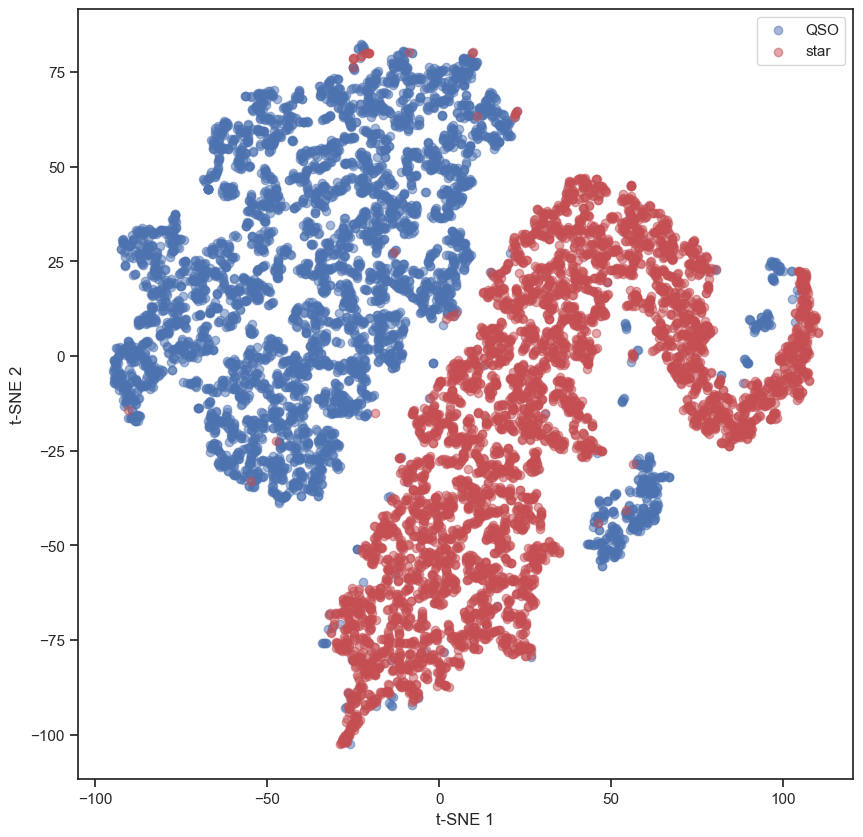

In [598]:
tsne_model = TSNE(n_components = 2, init = 'pca', perplexity = 25)
astro_tsne = tsne_model.fit_transform(astroX)

fig, ax = plt.subplots(figsize = (10, 10), sharex = True)
for cat in np.unique(cats):
    mask = (cats == cat)
    ax.scatter(astro_tsne[mask][:, 0], astro_tsne[mask][:, 1], label = cat, c = astro_colors[cat], alpha = 0.5)
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.legend();

*Too slow for full dataset (>10 min)...*

## Uniform Manifold Approximation and Projection (UMAP)

Uniform Manifold Approximation and Projection (UMAP) is a relatively new and powerful non-linear dimensionality reduction technique that is used primarily for visualization of high-dimensional data in lower dimensions (e.g., 2D or 3D). It is similar to t-SNE but is often faster, can better preserve global structure, and is more scalable to large datasets. UMAP was introduced in 2018 by Leland McInnes, John Healy, and James Melville as an efficient and scalable alternative to t-SNE for embedding high-dimensional data into a low-dimensional space.

**Assumption**: Data lies on a manifold: UMAP assumes that the high-dimensional data lies on a lower-dimensional manifold embedded in the high-dimensional space. The aim is to uncover this manifold and map it to a lower-dimensional space.

- Graph Construction (Local Relationships):
   - UMAP starts by constructing a weighted graph (also called a fuzzy simplicial complex) representing the data in the high-dimensional space.
  - It computes the distances between each pair of points and constructs a neighborhood graph by connecting each point to its closest neighbors. The neighborhood size is controlled by a hyperparameter called n_neighbors.
  - These connections are weighted based on the distance between points, and this graph is used to estimate the structure of the manifold.
- Optimization (Preserving Structure in Lower Dimensions):
   - UMAP then tries to optimize an embedding in the lower-dimensional space by constructing another graph in this space and minimizing the difference between the high-dimensional graph and the low-dimensional graph.
  - The embedding process uses stochastic gradient descent (SGD) to optimize the positions of the points in the low-dimensional space so that the structure of the neighborhood graph is preserved.

- Global and Local Structure: UMAP tries to preserve both local and global structure by optimizing the layout of points in the lower-dimensional space. By default, UMAP focuses more on local structure (similar to t-SNE), but its hyperparameters can be tuned to emphasize more global structures (the overall shape and large-scale relationships in the data).

**Steps in UMAP**:

- Compute a distance metric: UMAP uses a distance metric (like Euclidean distance) to compute pairwise distances between points in the high-dimensional space.

- Graph construction: A neighborhood graph is created where each point is connected to its nearest neighbors, forming a topological representation of the high-dimensional data.

- Optimization: A low-dimensional representation is created by projecting the data into a lower-dimensional space (usually 2D or 3D), where UMAP optimizes the layout of the points using stochastic gradient descent to maintain the structure of the neighborhood graph.

For a description of the details of UMAP see https://www.youtube.com/embed/nq6iPZVUxZU


In [599]:
import umap.umap_ as umap
reducer = umap.UMAP()

In [601]:
astro_umap = reducer.fit_transform(astroX)
astro_umap.shape

(10000, 2)

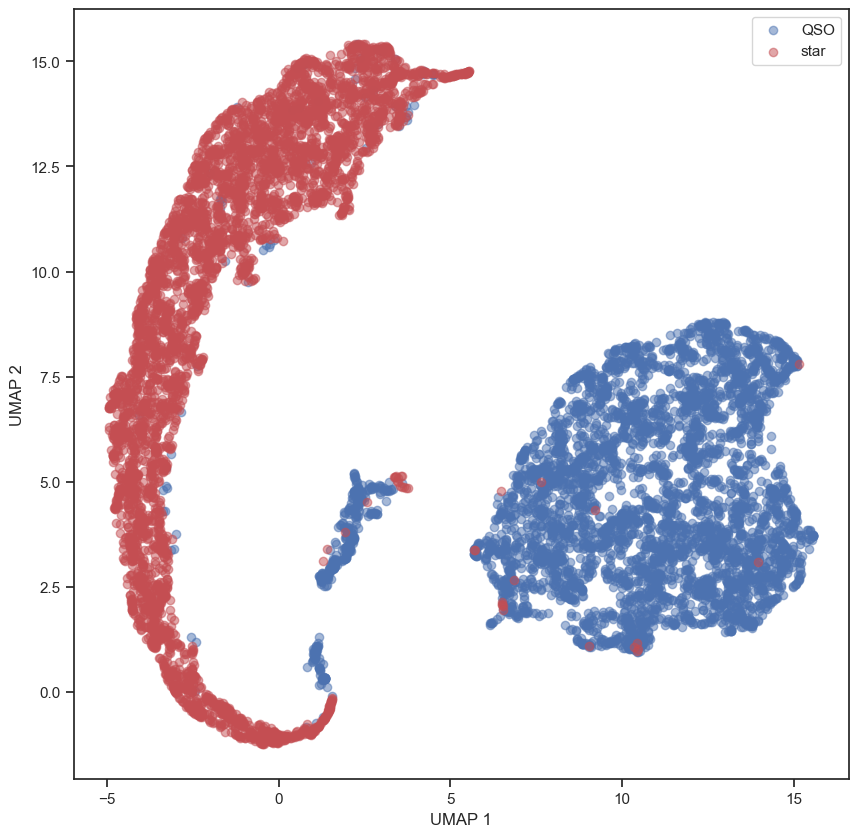

In [602]:
fig, ax = plt.subplots(figsize = (10, 10), sharex = True)
for cat in np.unique(cats):
    mask = (cats == cat)
    ax.scatter(astro_umap[mask][:, 0], astro_umap[mask][:, 1], label = cat, c = astro_colors[cat], alpha = 0.5)
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.legend();

### Balanced and Unbalanced data sets

Notice the difference when the data sets have different numbers of points in each class - astroX (even number of stars and qsos), astroX_full (> stars than QSOs)

In [603]:
astro_umap_full = reducer.fit_transform(astroX_full)
astro_umap_full.shape

(82429, 2)

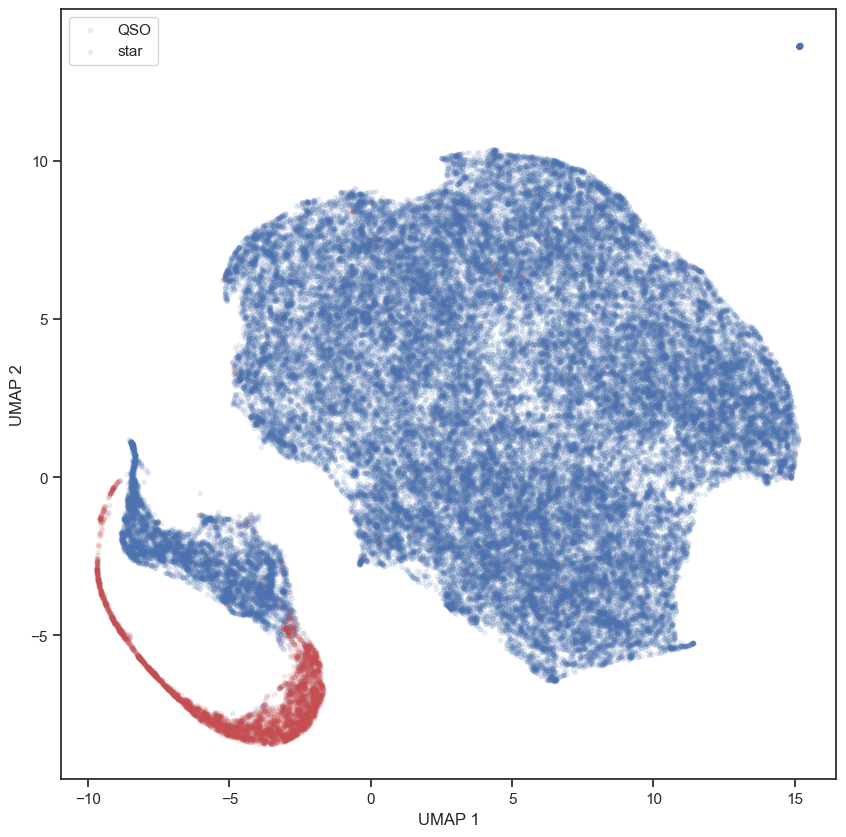

In [604]:
fig, ax = plt.subplots(figsize = (10, 10), sharex = True)
for cat in np.unique(cats_full):
    mask = (cats_full == cat)
    ax.scatter(astro_umap_full[mask][:, 0], astro_umap_full[mask][:, 1], label = cat, c = astro_colors[cat], alpha = 0.1, marker = '.')
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.legend();

# Clustering

Once we have the ability to visualize and reduce the dimensionality of the data we want to be able to look for clusters/groups within the data sets. This provides and indication of classes of sources. There are many approaches - we will look at three
- k-means
- Mixture Models
- DBScan
- Hierarchical clustering

See http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

![](images/clustering_comparison.png)

Clustering is the process of grouping similar objects together.

Two kinds of **inputs**:

1. **Similarity-based clustering**: input is an NxN **dissimilarity matrix** or **distance matrix D**.
2. **Feature-based clustering**: the input is an NxD feature matrix or design matrix **X**

Two types of **output**:

1. **flat clustering**, also called **partitional clustering**: objects are partitioned into disjoint sets

2. **Hierarchical clustering**: a nested tree of partitions is created

**Dissimilarity**

The dissimilarity matrix **D** is a matrix where $d_{i,i} = 0$ and $d_{i, j} \ge 0$ is a measure of distance between objects i and j

Most common way to define dissimilarity is to use dissimilarity of attributes:

$\Large \Delta(x_i, x_{i'}) = \sum\limits_{j=1}^{D} \Delta(x_{ij}, x_{i'j})$


**Common dissimilarity functions:**

* $\ell_2$ or squared (Euclidean) distance: 

$\Large ~~~~~~~~\Delta_j(x_{ij}, x_{i'j}) = (x_{ij} - x_{i'j})^2$

* $\ell_1$ or city block distance

$\Large~~~~~~~~\Delta_j(x_{ij}, x_{i'j}) = |x_{ij} - x_{i'j}|$


## **k-means**

Question is: how do we find clusters or estimate density efficiently?

<u> The _K-means_ algorithm </u>

The first approach for finding clusters that is always taught is $K$-means (simple and works well)

$K$-means partitions points into $K$ disjoint subsets ($C_k$) with each subset containing $N_k$
points 


It minimizes the objective/cost/likelihood function,
$\sum_{k=1}^K \sum_{i \in C_k} || x_i - \mu_k ||^2$

$\mu_k = \frac{1}{N_k} \sum_{i \in C_k} x_i$ is the mean of the
points in set $C_k$


_Procedure:_

1. define the number of clusters $K$
2. choose the centroid, $\mu_k$, of each of the $K$ clusters
3. assign each point to the cluster that it is closest to
4. update the centroid of each cluster by recomputing $\mu_k$ according to the new assignments.
5. goto (3) until there are no new assignments.

Global optima are not guaranteed but the process never increases the sum-of-squares error.

Typically we run multiple times with different starting values for the
centroids of $C_k$.


In [605]:
from sklearn.cluster import KMeans
from statistics import mode


def dokmeans(X, n_clusters, modellabel, truelabels, colors):
    kmean_model = KMeans(n_clusters=n_clusters, n_init=10)
    kmean_model.fit(X)
    centers = kmean_model.cluster_centers_
    labels = kmean_model.labels_
    fig, ax = plt.subplots(figsize=(10, 10))
    nwrong = 0
    for label in np.unique(labels):
        mask = (label == labels)
        truelabel = mode(truelabels[mask])
        maskwrong = mask & (truelabels != truelabel)
        nwrong += np.sum(maskwrong)
        ax.scatter(X[mask, 0], X[mask, 1], c=colors[truelabel], alpha=0.5)
        ax.scatter(X[maskwrong, 0],
                   X[maskwrong, 1],
                   c=colors[truelabel],
                   marker='o',
                   s=200,
                   alpha=0.5,
                   facecolors='None')
    ax.scatter(X[maskwrong, 0], X[maskwrong, 1])
    ax.scatter(centers[:, 0], centers[:, 1], marker='*', c='k', s=200)
    points = np.array(list(zip(centers[:, 0], centers[:, 1])))
    if len(points) > 3:
        voronoi_plot_2d(Voronoi(points),
                        ax,
                        show_points=False,
                        show_vertices=False,
                        line_width=5)
    ax.set_xlabel("%s 1" % modellabel)
    ax.set_ylabel("%s 1" % modellabel)
    ax.set_title("%.3f missclassification fraction" % (1. * nwrong / len(labels)))

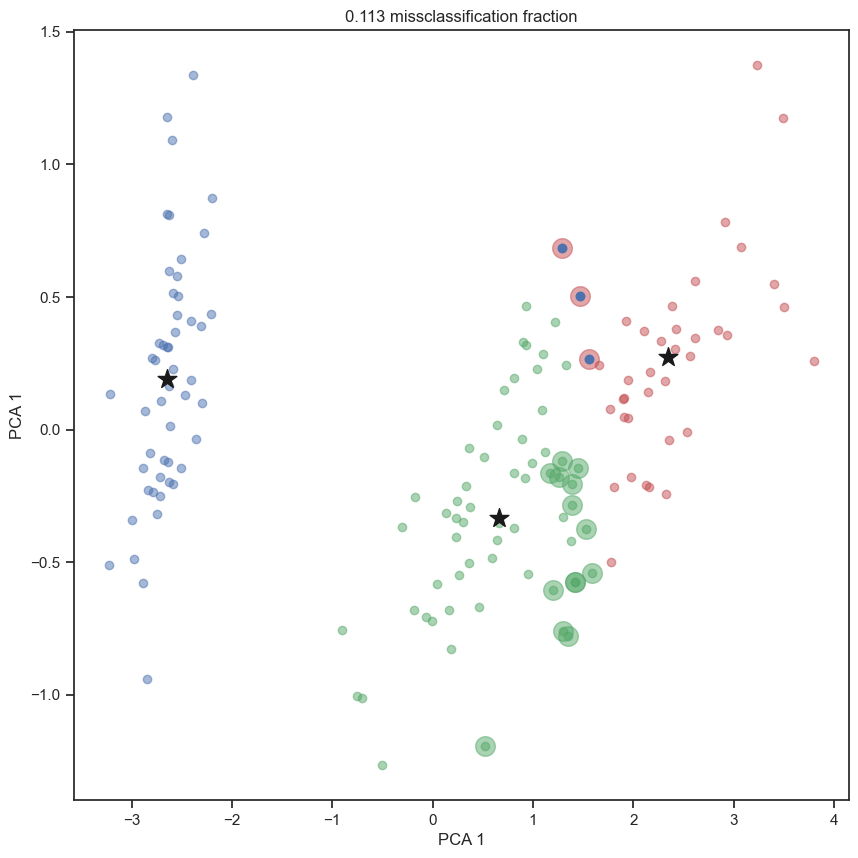

In [606]:
dokmeans(iris_pca,  3, 'PCA', species, iris_colors)

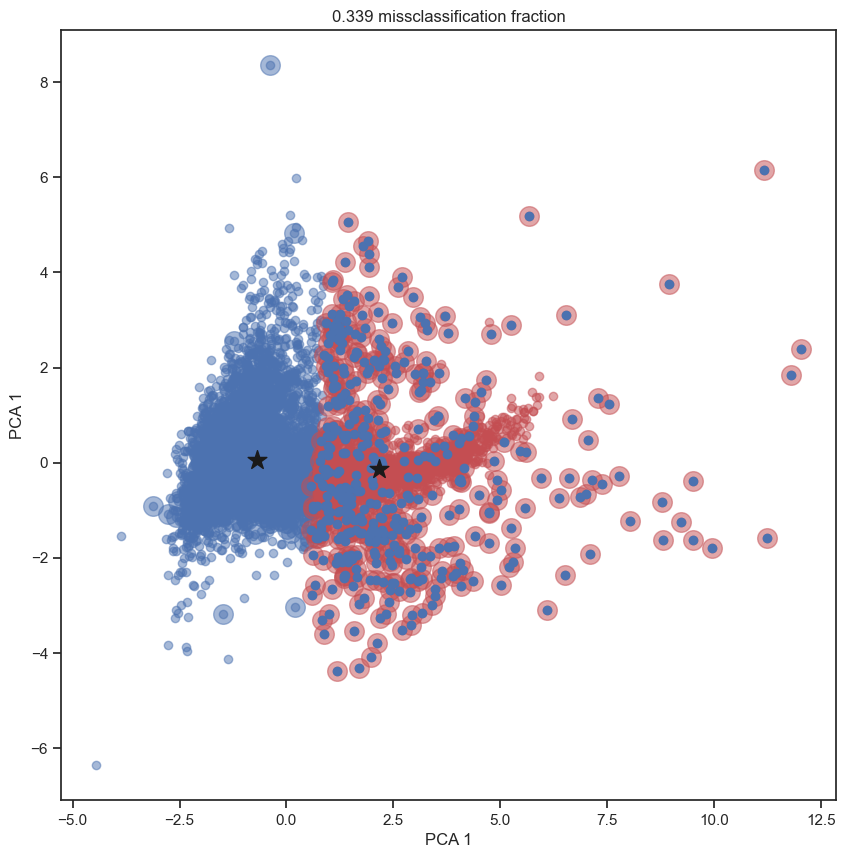

In [609]:
dokmeans(astro_pca, 2, 'PCA', cats, astro_colors)

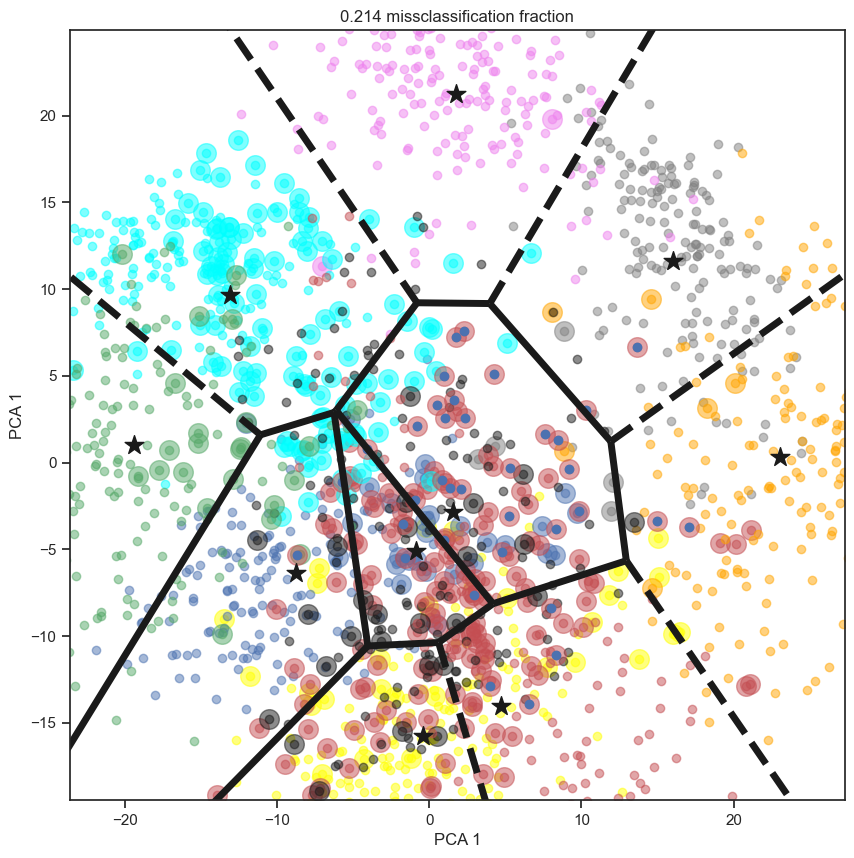

In [610]:
mnist_colors = {0: 'violet', 1: 'r', 2: 'b', 3: 'g', 4: 'orange', 5: 'k', 6: 'gray', 7: 'yellow', 8: 'brown', 9: 'cyan'}
dokmeans(mnist_pca, 10, 'PCA', digits.target, mnist_colors)

#### QUESTION: How do you choose the number of clusters?

## Mixture models

Mixture models use the sum of functions to represent the density distributions - used in defining the density, classifications, cloning of a data set....

Gaussian mixture models (GMMs) are the most common implementation of mixture models

$\rho(\mathbf{x}) = N\, p(\mathbf{x})
  = N\, \sum_{j=1}^M \alpha_j \mathcal{N}(\mu_j, \Sigma_j)$
  

where the model consists of $N$ Gaussians with locations $\mu_j$
and covariances $\Sigma_j$. The log-likelihood is straightforward to define by this model.

<u> _Expectation maximization_ </u> is typically employed to solve for the mixture of Gaussians


- _Expectation_

  - Given a set of Gaussians compute the “expected” classes of all points

- _Maximization_

  - Estimate the MLE of $\mu$, amplitude, and $\Sigma$ given the data’s class membership 

Iterative proceedure until variance does not change. Guaranteed to converge -  monotonically approaches a local minimum of the cost function (but guaranteed to be the correct answer).

In [613]:
from matplotlib.patches import Ellipse
def draw_ellipse(mu, C, scales=[1, 2], ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    # find principal components and rotation angle of ellipse
    sigma_x2 = C[0, 0]
    sigma_y2 = C[1, 1]
    sigma_xy = C[0, 1]

    # Compute the angle of rotation for the ellipse
    theta = 0.5 * np.arctan2(2 * sigma_xy, (sigma_x2 - sigma_y2))
    tmp1 = 0.5 * (sigma_x2 + sigma_y2)
    tmp2 = np.sqrt(0.25 * (sigma_x2 - sigma_y2) ** 2 + sigma_xy ** 2)

    sigma1 = np.sqrt(tmp1 + tmp2)  # Major axis
    sigma2 = np.sqrt(tmp1 - tmp2)  # Minor axis

    # Plot ellipses at different scales
    for scale in scales:
        ellipse = Ellipse(xy=(mu[0], mu[1]), 
                          width=2 * scale * sigma1, 
                          height=2 * scale * sigma2,
                          angle=np.degrees(theta),  # Use `angle` keyword
                          **kwargs)
        ax.add_patch(ellipse)

/var/folders/_n/wp9xhwf53ds8mr70wtgy43b40000gn/T/ipykernel_71360/2226424241.py:16: RuntimeWarning:

divide by zero encountered in divide

/Users/ajc/miniconda3/lib/python3.10/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning:

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

/Users/ajc/miniconda3/lib/python3.10/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning:

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

/Users/ajc/miniconda3/lib/python3.10/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning:

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



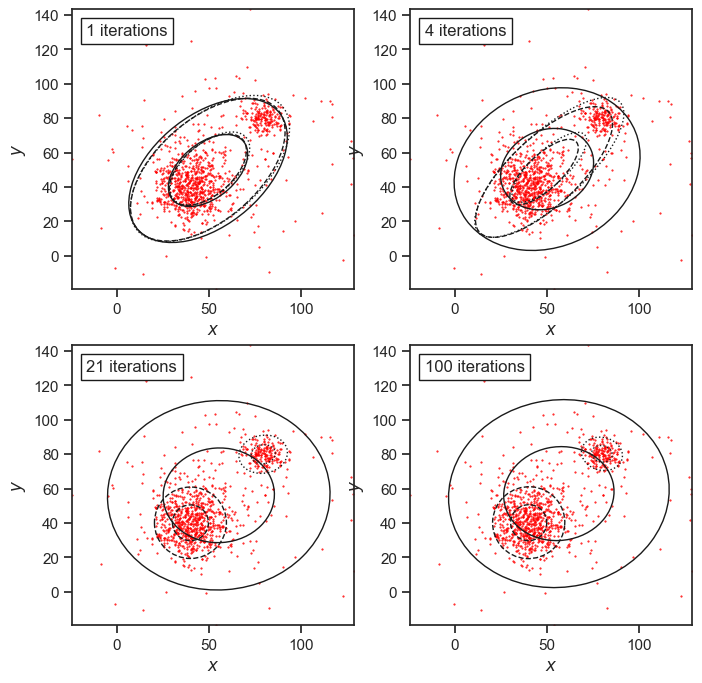

In [614]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from astroML.utils import convert_2D_cov

def generate_data(clusters, Npts):
    '''generate data set given set of gaussians'''
    # Set the internal means, covariances, and weights by-hand.
    gmm_input = GaussianMixture(len(clusters), covariance_type='full')
    gmm_input.means_ = np.array([c[0] for c in clusters])
    gmm_input.covariances_ = np.array([convert_2D_cov(*c[1:4]) for c in clusters])
    gmm_input.weights_ = np.array([c[4] for c in clusters])
    gmm_input.weights_ /= gmm_input.weights_.sum()
    gmm_input.precisions_cholesky_ = 1 / np.sqrt(gmm_input.covariances_)
    gmm_input.fit = None
    return gmm_input.sample(Npts)[0]

# define clusters as (mu, sigma1, sigma2, alpha, frac)
Npts=1000
clusters = [((50, 50), 20, 20, 0, 0.1),
        ((40, 40), 10, 10, np.pi / 6, 0.6),
        ((80, 80), 5, 5, np.pi / 3, 0.2),
        ((60, 60), 30, 30, 0, 0.1)]

X = generate_data(clusters, Npts)

#------------------------------------------------------------
# Compute and plot the results
fig = plt.figure(figsize=(8, 8))

def plot_gmm_solution(ax, clf, iterations):  
    ax.plot(X[:, 0], X[:, 1], '.', c='red', ms=1, zorder=1)
    ax.set_xlim(X[:,0].min(), X[:,0].max())
    ax.set_ylim(X[:,1].min(), X[:,1].max())
    ax.set_ylabel('$y$')
    ax.set_xlabel('$x$')
    
    for i in range(clf.n_components):
        mean = clf.means_[i]
        cov = clf.covariances_[i]
        if cov.ndim == 1:
            cov = np.diag(cov)
        draw_ellipse(mean, cov, ax=ax, fc='none', ec='k',ls=linestyles[i], zorder=2)
    
    ax.text(0.05, 0.95, "%i iterations" % iterations,
        ha='left', va='top', transform=ax.transAxes,
        bbox=dict(fc='w', ec='k'))

 
linestyles = ['-', '--', ':']
np.random.seed(1)
#plot solutions as a function of iteration
def fitAndPlot(X, n_components=1, n_iter=100):
    
    for i,iter in enumerate(np.logspace(0, np.log10(n_iter), 4, dtype=int)):
        clf = GaussianMixture(n_components, random_state=np.random.seed(1), 
                              max_iter=iter, init_params='random').fit(X)

        ax = fig.add_subplot(2,2,i+1)
        plot_gmm_solution(ax, clf, iter)
  
fitAndPlot(X, n_components=3, n_iter=100)


In [615]:
from sklearn import mixture
from scipy import linalg
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from matplotlib import colors

def plot_results(X, Y_, means, covariances, index, title, ax=ax):
    #splot = plt.subplot(aspect = 1)
    for i, (mean, covar) in enumerate(zip(
            means, covariances)):
        color = cmap(norm(i)**2)
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # show only predicted classes
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], color=color, alpha = 0.2)
        plt.scatter(mean[0], mean[1], c = 'k', zorder = 1000, marker = '*')

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180. + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

    #plt.xticks(())
    #plt.yticks(())
    plt.title(title)

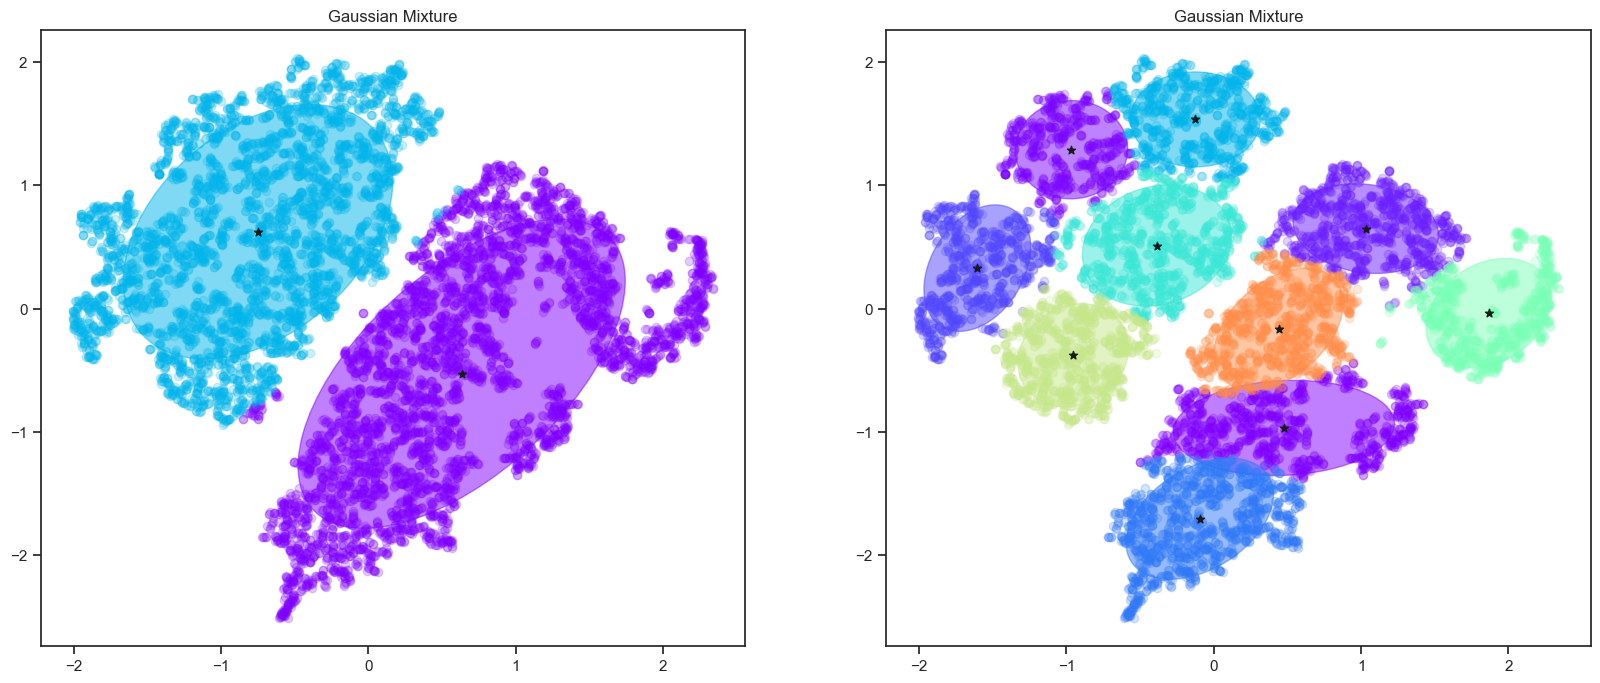

In [616]:
X = astro_tsne  
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


n_components = 2  # we assume 2 classes
GMM_model = mixture.GaussianMixture(n_components=n_components,
                                    covariance_type='full')
GMM_model.fit(X)
cmap = plt.cm.rainbow
norm = colors.Normalize(vmin=0, vmax=n_components)

fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(1, 2, 1)

plot_results(X, GMM_model.predict(X), GMM_model.means_, GMM_model.covariances_,
             0, 'Gaussian Mixture', ax=ax)

n_components = 10  # we assume 10 classes
GMM_model = mixture.GaussianMixture(n_components=n_components,
                                    covariance_type='full')
GMM_model.fit(X)
cmap = plt.cm.rainbow
norm = colors.Normalize(vmin=0, vmax=n_components)

ax = fig.add_subplot(1, 2, 2)

plot_results(X, GMM_model.predict(X), GMM_model.means_, GMM_model.covariances_,
             0, 'Gaussian Mixture', ax=ax)

#### QUESTION: How many classes are there in the data? It is the same data set

## How do we choose the number of components? <a id='comp'></a>


Typically used as a density estimation and not as a way of determining the number of Gaussians in a distribution (e.g. imagine what would happen with a single cluster and a uniform background)

Both **Akaike information criterion (AIC)** and **Bayesian information criterion (BIC)** are scoring systems for model comparisons in classical statistics dealing with models with different numbers of free parameters.  

Specifically, **AIC** is computed as

$$AIC \equiv -2 ln(L^0(M)) + 2k + \frac{2k(k+1)}{N-k-1}$$  

**BIC** is computed as

$$BIC \equiv -2ln[L^0(M)] + k lnN$$  
  
AIC, BIC, and cross-validation are often used to define the number of parameters (though this is rarely well defined)
See http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html

best fit converged: True
n_components =  7
0.44119048311457576


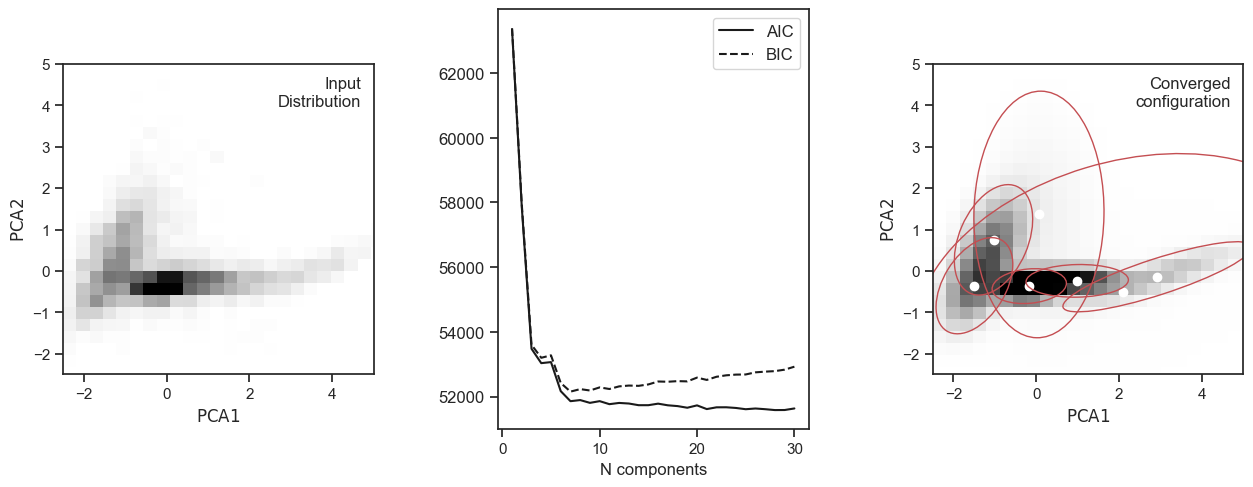

In [619]:
from scipy.stats import norm
from itertools import cycle

from astroML.datasets import fetch_sdss_sspp
from astroML.decorators import pickle_results

#------------------------------------------------------------
# Get the Segue Stellar Parameters Pipeline data
data = fetch_sdss_sspp(cleaned=True)
#X = np.vstack([data['FeH'], data['alphFe']]).T
X = astro_pca
# truncate dataset for speed
X = X[:,:2]
#------------------------------------------------------------
# Compute GMM models & AIC/BIC
N = np.linspace(1, 30, 30, dtype=int)

def compute_GMM(N, covariance_type='full', n_iter=1000):
    models = [None for n in N]
    for i in range(len(N)):
        models[i] = GaussianMixture(N[i], max_iter=500).fit(X)
    return models

models = compute_GMM(N)

AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

i_best = np.argmin(BIC)
gmm_best = models[i_best]
print ("best fit converged:", gmm_best.converged_)
print ("n_components =  %i" % N[i_best])

#------------------------------------------------------------
# compute 2D density
FeH_bins = 51
alphFe_bins = 51
H, FeH_bins, alphFe_bins = np.histogram2d(X[:,0], X[:,1],
                                          (FeH_bins, alphFe_bins))

Xgrid = np.array(list(map(np.ravel,
                     np.meshgrid(0.5 * (FeH_bins[:-1]
                                        + FeH_bins[1:]),
                                 0.5 * (alphFe_bins[:-1]
                                        + alphFe_bins[1:]))))).T
log_dens = gmm_best.score_samples(Xgrid).reshape((51, 51))

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(19, 6))
fig.subplots_adjust(wspace=0.4,
                    bottom=0.2, top=0.9,
                    left=0.1, right=0.95)

# plot density
ax = fig.add_subplot(141)
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='equal',
          extent=[FeH_bins[0], FeH_bins[-1], alphFe_bins[0], alphFe_bins[-1]],
          cmap=plt.cm.binary,
          vmin = 2, vmax = 300,
          )
ax.set_xlabel(r'$\rm PCA 1$')
ax.set_ylabel(r'$\rm PCA 2$')
#ax.xaxis.set_major_locator(plt.MultipleLocator(0.3))
ax.set_xlim(-2.5, 5.)
ax.set_ylim(-2.5, 5.)
ax.text(0.96, 0.96, "Input\nDistribution", fontsize=12,
        va='top', ha='right', transform=ax.transAxes)

# plot AIC/BIC
ax = fig.add_subplot(142)
ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, '--k', label='BIC')
ax.legend(loc=1, prop=dict(size=12))
ax.set_xlabel('N components')
plt.setp(ax.get_yticklabels(), fontsize=12)

# plot best configurations for AIC and BIC
ax = fig.add_subplot(143)
print (np.exp(log_dens).max())
ax.imshow(np.exp(log_dens),
          origin='lower', interpolation='nearest', aspect='equal',
          extent=[FeH_bins[0], FeH_bins[-1], alphFe_bins[0], alphFe_bins[-1]],
          cmap=plt.cm.binary,
          vmin=0, vmax=0.2,
          )

linestyles = ['-', '--', ':']
# plot best configurations for AIC and BIC
ax.scatter(gmm_best.means_[:, 0], gmm_best.means_[:, 1], c='w')
for i in range(gmm_best.n_components):
    mean = gmm_best.means_[i]
    cov = gmm_best.covariances_[i]
    if cov.ndim == 1:
        cov = np.diag(cov)
    draw_ellipse(mean, cov, ax=ax, scales=[2,],fc='none', ec='r', zorder=2)
    
ax.text(0.96, 0.96, "Converged\nconfiguration", fontsize=12,
        va='top', ha='right', transform=ax.transAxes)

ax.set_xlim(-2.5, 5.)
ax.set_ylim(-2.5, 5.)
ax.set_xlabel(r'$\rm PCA 1$')
ax.set_ylabel(r'$\rm PCA 2$')

plt.show()

## Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

DBSCAN is a popular clustering algorithm in machine learning that identifies clusters of varying shapes and sizes in datasets and separates noise (outliers) from clusters. Unlike algorithms such as k-means, DBSCAN doesn't require you to specify the number of clusters in advance, and it works well when clusters are of arbitrary shape, making it robust in many real-world applications.

Density-based spatial clustering of applications with noise (DBSCAN)

* Given a set of points in some space, group together points that are closely packed and mark as outliers those in low-density regions

    * Core Points: A point is a core point if it has at least min_samples neighbors within a radius of eps.
    * Border Points: A point is a border point if it lies within eps of a core point, but it does not have enough neighbors to be a core point itself.
    * Noise Points (Outliers): A point is considered noise if it is neither a core point nor a border point (i.e., it does not belong to any cluster).

There are two key parameters that drive DBSCAN:

* eps (epsilon): This is the maximum distance between two points for them to be considered as neighbors. It defines the radius around a point to look for neighboring points.

* min_samples: This is the minimum number of points required to form a dense region (or cluster). A point is considered a core point if it has at least min_samples points within its eps radius.

**How DBSCAN Works:**

* Start with an arbitrary point:
    * If the point has at least min_samples points within eps, it's a core point and a new cluster is formed.
    * If the point has fewer than min_samples points within eps, it is labeled as noise for now (this point might later become a border point if it falls within eps of another core point).

* Expand the cluster:
  * For each core point, all points within the eps neighborhood are added to the cluster.
  *  For each new point added to the cluster, if it's also a core point, the process is repeated recursively, expanding the cluster by including its neighbors.
    * This expansion continues until no more points can be added to the cluster.


* Move to the next unvisited point:
    * The process is repeated for each unvisited point in the dataset until all points are either assigned to a cluster or marked as noise.

![](images/DBSCAN.png)

See http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [620]:
from sklearn.cluster import DBSCAN
from statistics import mode

/var/folders/_n/wp9xhwf53ds8mr70wtgy43b40000gn/T/ipykernel_71360/3777538852.py:19: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



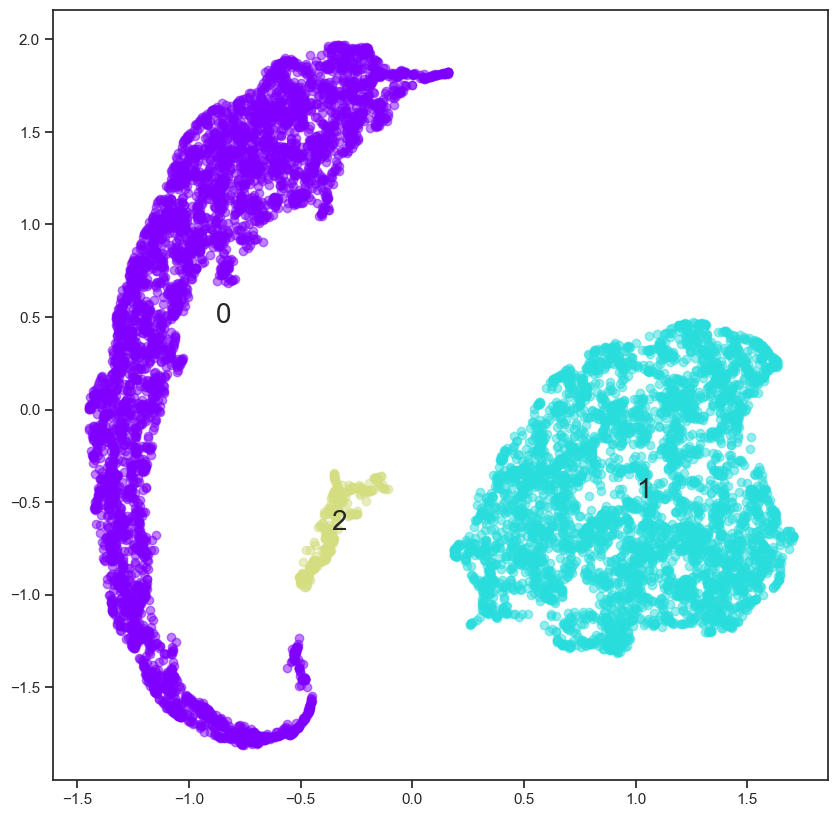

In [621]:
X = astro_umap # mnist_pca mnist_nmf
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
fig, ax = plt.subplots(figsize = (10, 10))
DBSCAN_model = DBSCAN(eps = .1, min_samples = 5, metric='euclidean', \
                      metric_params=None, algorithm='auto', leaf_size=30)
DBSCAN_model.fit(X)
labels = np.array(DBSCAN_model.labels_)
cmap = plt.cm.rainbow
norm = colors.Normalize(vmin=0, vmax=len(np.unique(labels)))
for idx, label in enumerate(np.unique(labels)):
    mask= label == labels
    c = cmap(norm(idx))
    t = label
    if label == -1:
        c = 'k'
        t = ""
    ax.scatter(X[mask, 0], X[mask, 1], c = c, alpha = 0.5)
    ax.text(np.average(X[mask, 0]), np.average(X[mask, 1]), t, fontsize = 20)

/var/folders/_n/wp9xhwf53ds8mr70wtgy43b40000gn/T/ipykernel_71360/2665465658.py:19: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



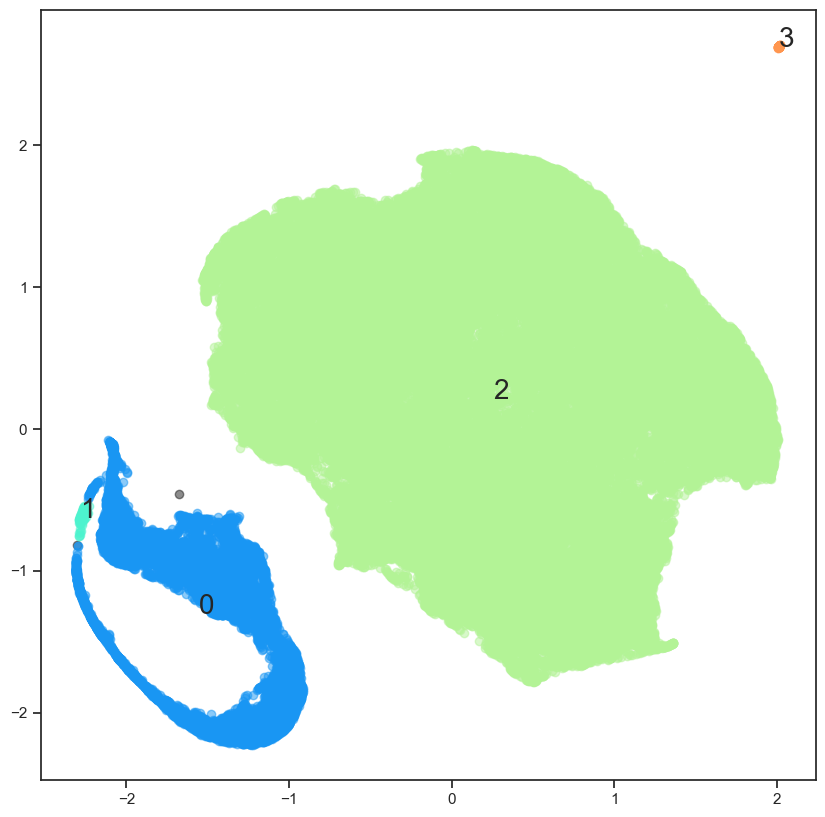

In [622]:
X = astro_umap_full # mnist_pca mnist_nmf
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
fig, ax = plt.subplots(figsize = (10, 10))
DBSCAN_model = DBSCAN(eps = .05, min_samples = 5, metric='euclidean', \
                      metric_params=None, algorithm='auto', leaf_size=30)
DBSCAN_model.fit(X)
labels = np.array(DBSCAN_model.labels_)
cmap = plt.cm.rainbow
norm = colors.Normalize(vmin=0, vmax=len(np.unique(labels)))
for idx, label in enumerate(np.unique(labels)):
    mask= label == labels
    c = cmap(norm(idx))
    t = label
    if label == -1:
        c = 'k'
        t = ""
    ax.scatter(X[mask, 0], X[mask, 1], c = c, alpha = 0.5)
    ax.text(np.average(X[mask, 0]), np.average(X[mask, 1]), t, fontsize = 20)

# Hierarchical clustering

Hierarchical Clustering is a method of cluster analysis that seeks to build a hierarchy of clusters. Unlike partitioning methods like k-means, hierarchical clustering does not require specifying the number of clusters in advance. It creates a tree-like structure, called a dendrogram, which shows how data points are grouped at different levels of similarity.

![](images/hierarchical.png)

## Agglomerative clustering

Agglomerative Clustering is a type of hierarchical clustering that builds nested clusters in a bottom-up approach. It starts with each data point as its own individual cluster and then iteratively merges the closest clusters until all the points are grouped into a single cluster, forming a hierarchical tree-like structure known as a dendrogram.

It is based on the $n \times n$ matrix ${\bf D} = (d(x_i, x_j))$

* start with $n$ clusters each with one member

* clusters with the smallest value in the distance matrix are merged

* their rows and columns are removed and replaced with a new row and column based on the center of the cluster

* merging is repeated $n - 1$ times until the entire dataset of $n$ points is contained in a single cluster

* the result is plotted as a tree or dendrogram with $n$ leaves at one end

* process usually requires $O(n^2 \log n)$ or $O(n^2)$

Clustering depends strongly on the definition of distance between a cluster and a new point.

* Let's define $d_{C,k} = d_{1, 2, ..j, k}$ where $k$ represents the new point and the cluster $C$ has $j$ members.

* There are four common choices:

### Single linkage clustering:

$d_{C, k} = \min (d_{1,k}, d_{1,k}, ..., d_{j, k})$

The distance to the closest member in the cluster (known as friends-of-friends in astronomy)

It can result in asymmetric and elongated with low surface density.

### Complete linkage clustering

$d_{C, k} = \max (d_{1,k}, d_{1,k}, ..., d_{j, k})$

It gives groupings that are more symmetrical and compact.


### Average linkage clustering:

$d_{C, k} = \frac{1}{j} \sum\limits_{i=1}^j d_{i, k}$

Intermediate between single and complete linkage clustering

### Ward's minimum variance

Clusters to be merged are chosen to minimize the increase in the sum of the intra-cluster summed squared distances. 

The group-to-point distance is a weighted Euclidean distance.

Cluster hierarchy gives roughly spherical or ellipsoidal cluster shapes.

### Test with COMBO-17 data

Download COMBO17 data from here https://astrostatistics.psu.edu/MSMA/datasets/index.html

In [623]:
df = pd.read_csv("data/COMBO17_lowz.dat", sep="\s+").sample(30)
df.head()

V1    V2
555 -14.79 -0.76
364 -16.75 -0.32
398 -15.81 -0.06
410 -15.11 -0.17
284 -18.03  0.76

In [624]:
df.shape

(30, 2)

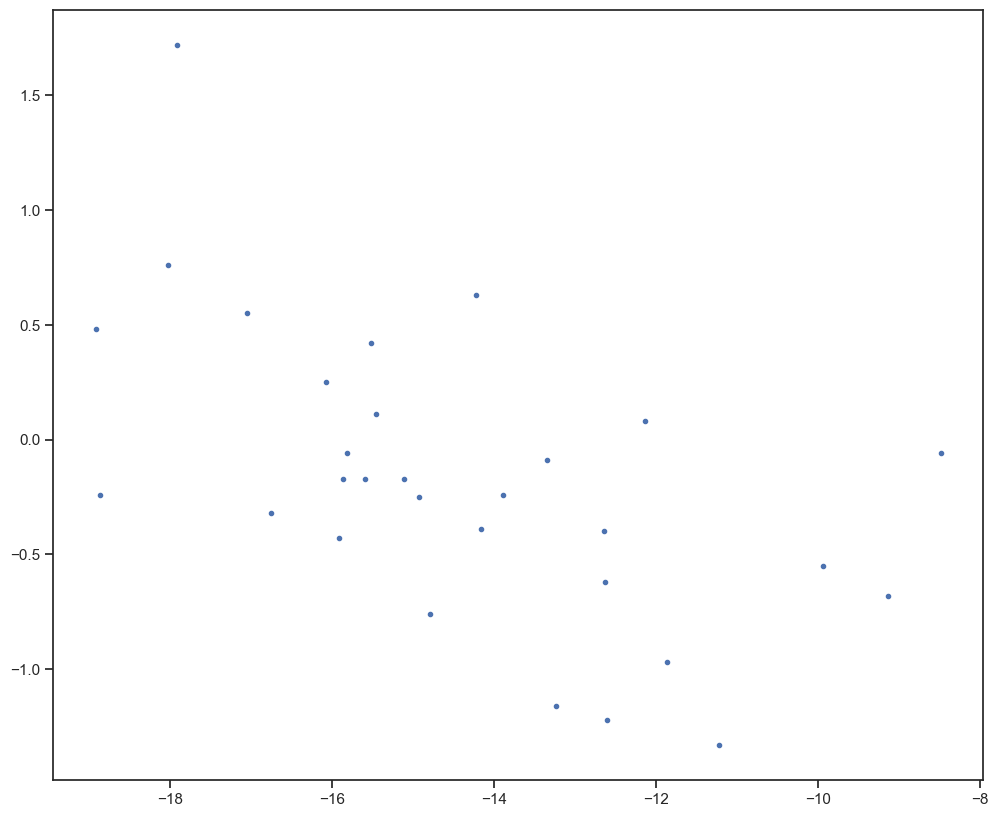

In [625]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(df.V1, df.V2, marker = '.')

**Compute the distance matrix**

In [626]:
# used to compute upper diagonal part of distance matrix
from scipy.spatial.distance import pdist

In [627]:
df.shape

(30, 2)

In [628]:
dist = pdist(df.values)

In [629]:
dist.shape

(435,)

In [630]:
df.shape[0]**2/2. - df.shape[0]/2.

435.0

**Compute linkage matrix**

A (n-1) by 4 matrix Z

At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster.

A cluster with an index less than n+i corresponds to one of the original observations.

The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2].

The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

See https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In [631]:
# used to compute linkage function and plot dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

Let's start with single linkage clustering

In [632]:
Z = linkage(dist, 'single')
Z.shape

(29, 4)

Let's check the last 10 rows

In [633]:
pd.DataFrame(Z)

0     1         2     3
0    2.0  25.0  0.120830   2.0
1    3.0  22.0  0.196977   2.0
2   18.0  26.0  0.220227   2.0
3   20.0  30.0  0.245967   3.0
4   21.0  33.0  0.264764   4.0
5   29.0  34.0  0.308707   5.0
6    6.0  11.0  0.308869   2.0
7   17.0  35.0  0.315753   6.0
8   10.0  37.0  0.411096   7.0
9   31.0  38.0  0.448219   9.0
10   0.0  39.0  0.528867  10.0
11  12.0  36.0  0.570088   3.0
12  19.0  32.0  0.600750   3.0
13  14.0  42.0  0.632851   4.0
14   5.0  43.0  0.700357   5.0
15   8.0  16.0  0.722496   2.0
16  40.0  41.0  0.730616  13.0
17   9.0  23.0  0.743034   2.0
18  44.0  46.0  0.765572  18.0
19  47.0  48.0  0.771622  20.0
20  13.0  24.0  0.820366   2.0
21   1.0  49.0  0.847172  21.0
22   7.0  50.0  0.898276   3.0
23  27.0  51.0  0.920272  22.0
24  15.0  53.0  0.930484  23.0
25   4.0  45.0  0.933006   3.0
26  28.0  55.0  0.966282   4.0
27  54.0  56.0  1.002247  27.0
28  52.0  57.0  1.498933  30.0

Do the dendrogram, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

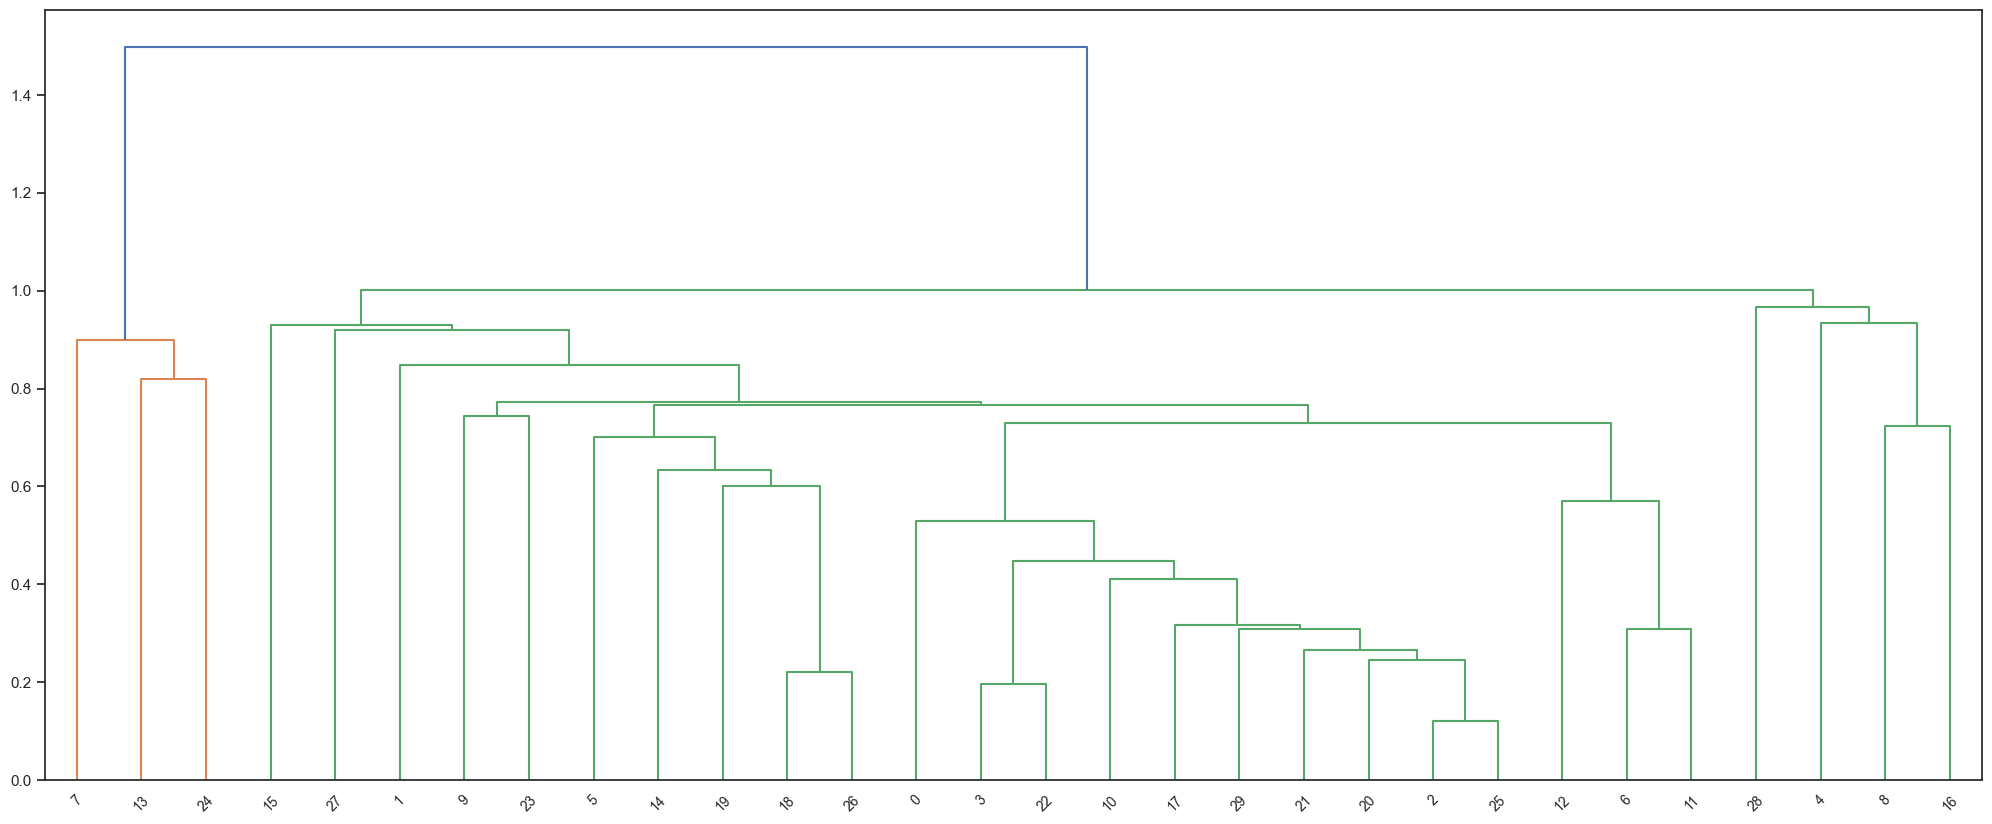

In [634]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Now let's try complete linkage clustering

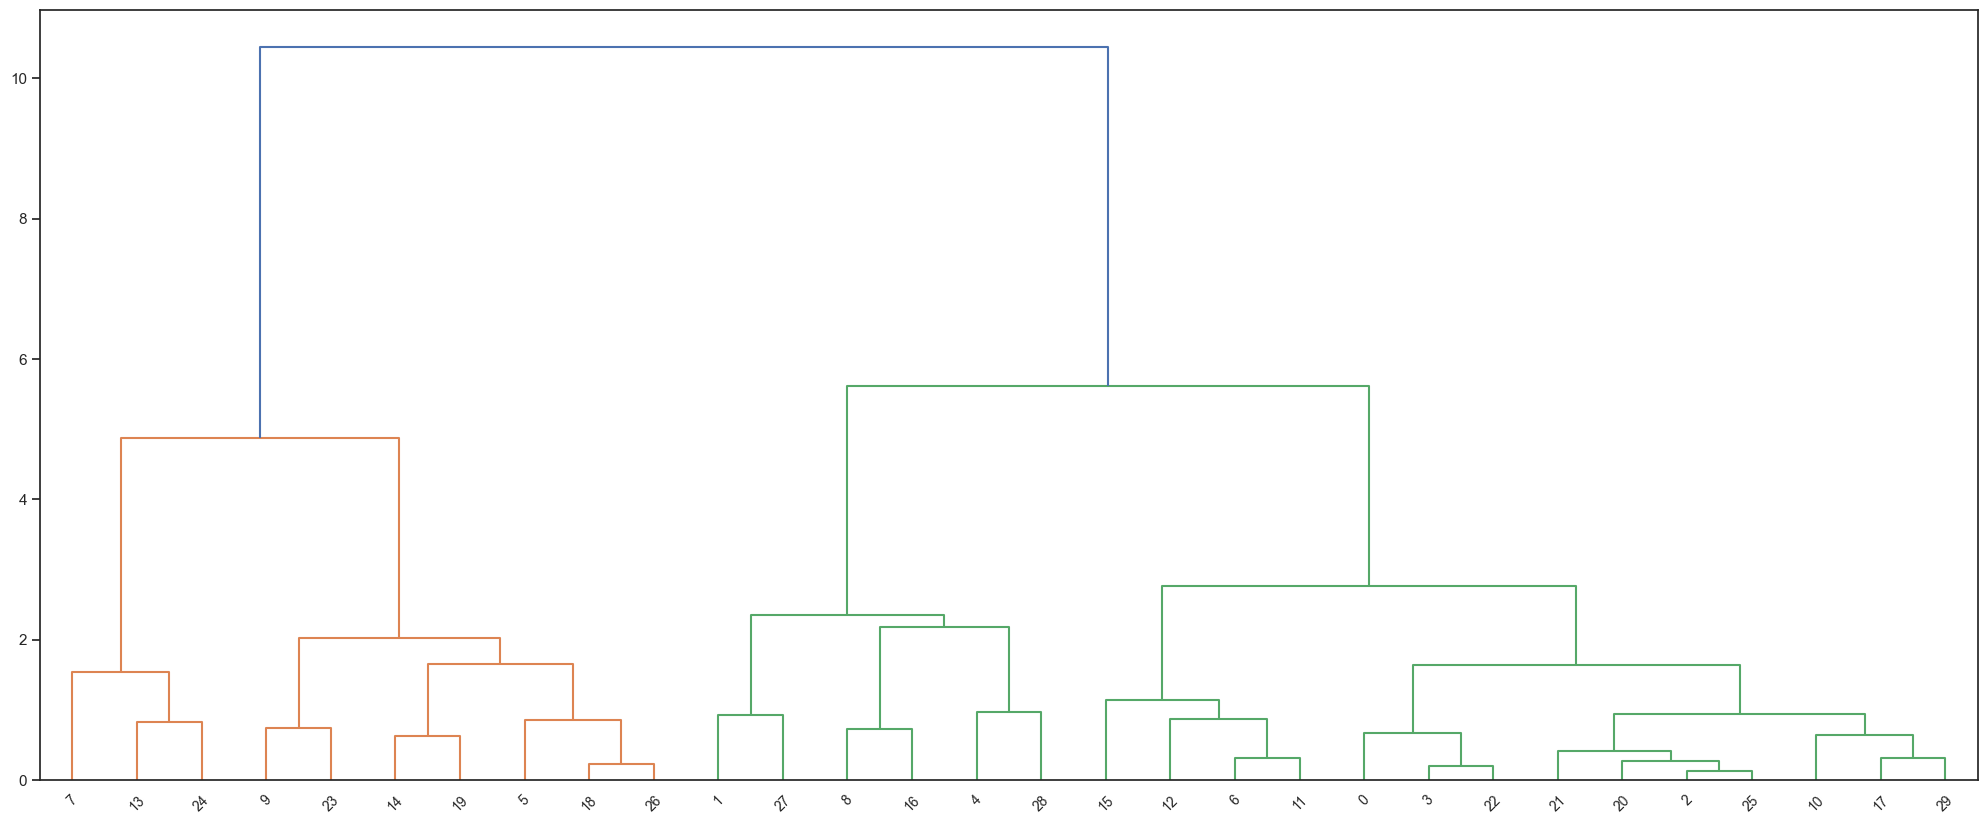

In [635]:
Z = linkage(dist, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Average linkage clustering

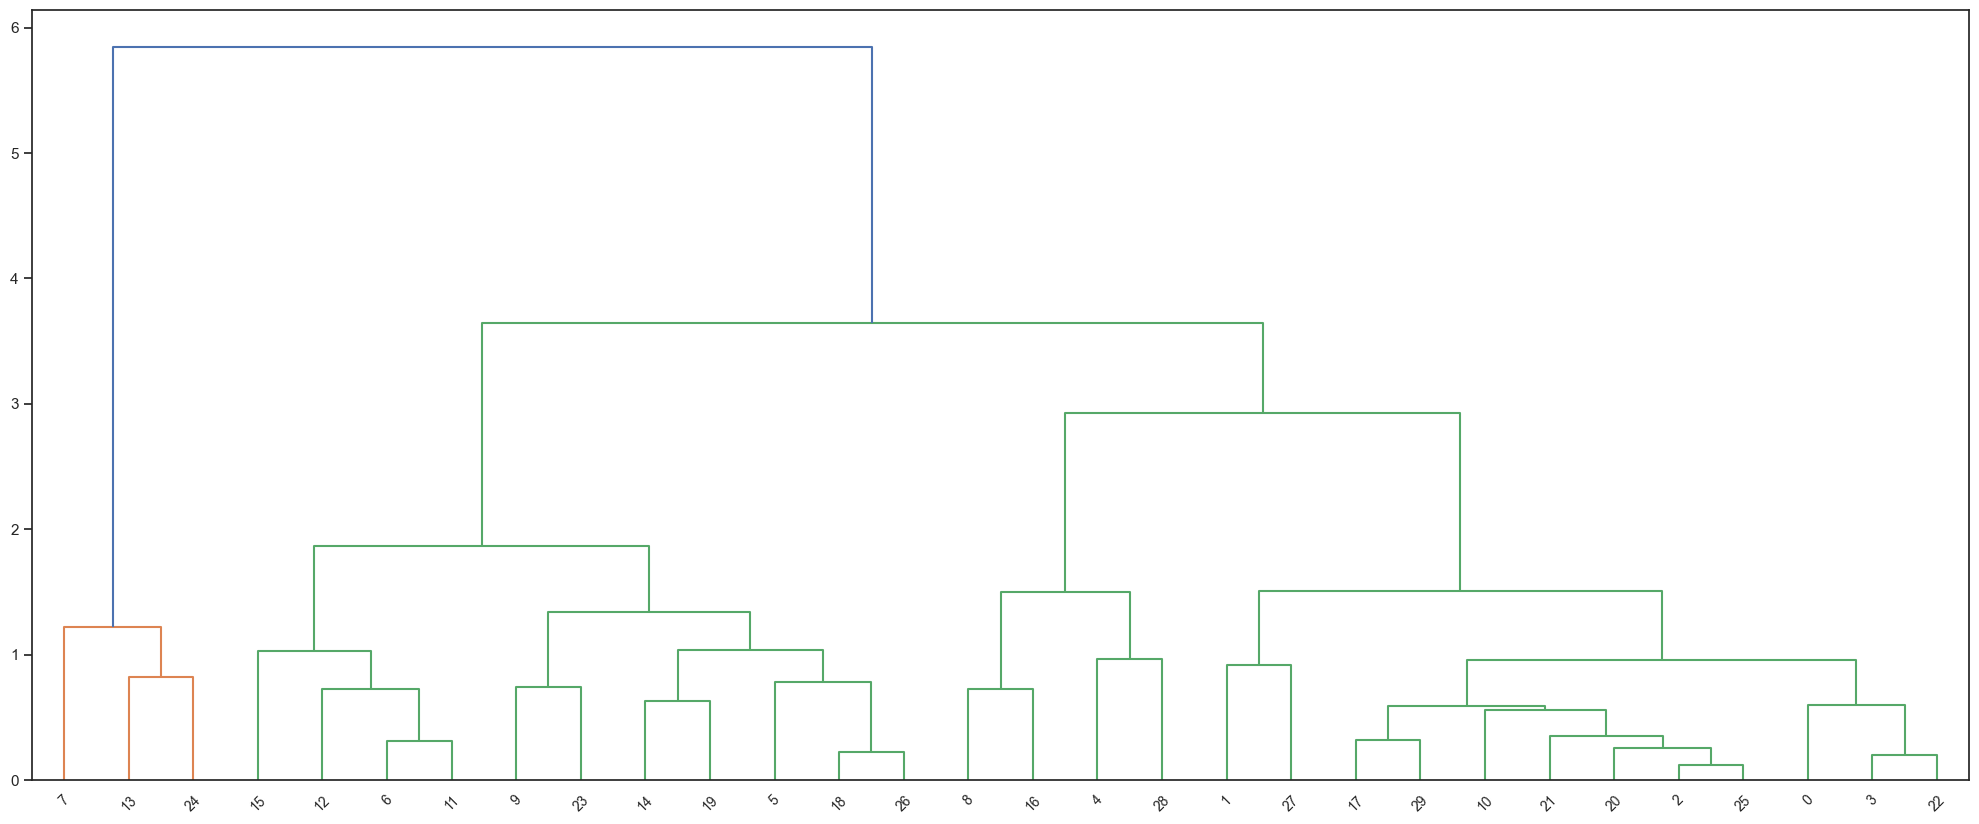

In [636]:
Z = linkage(dist, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Ward clustering

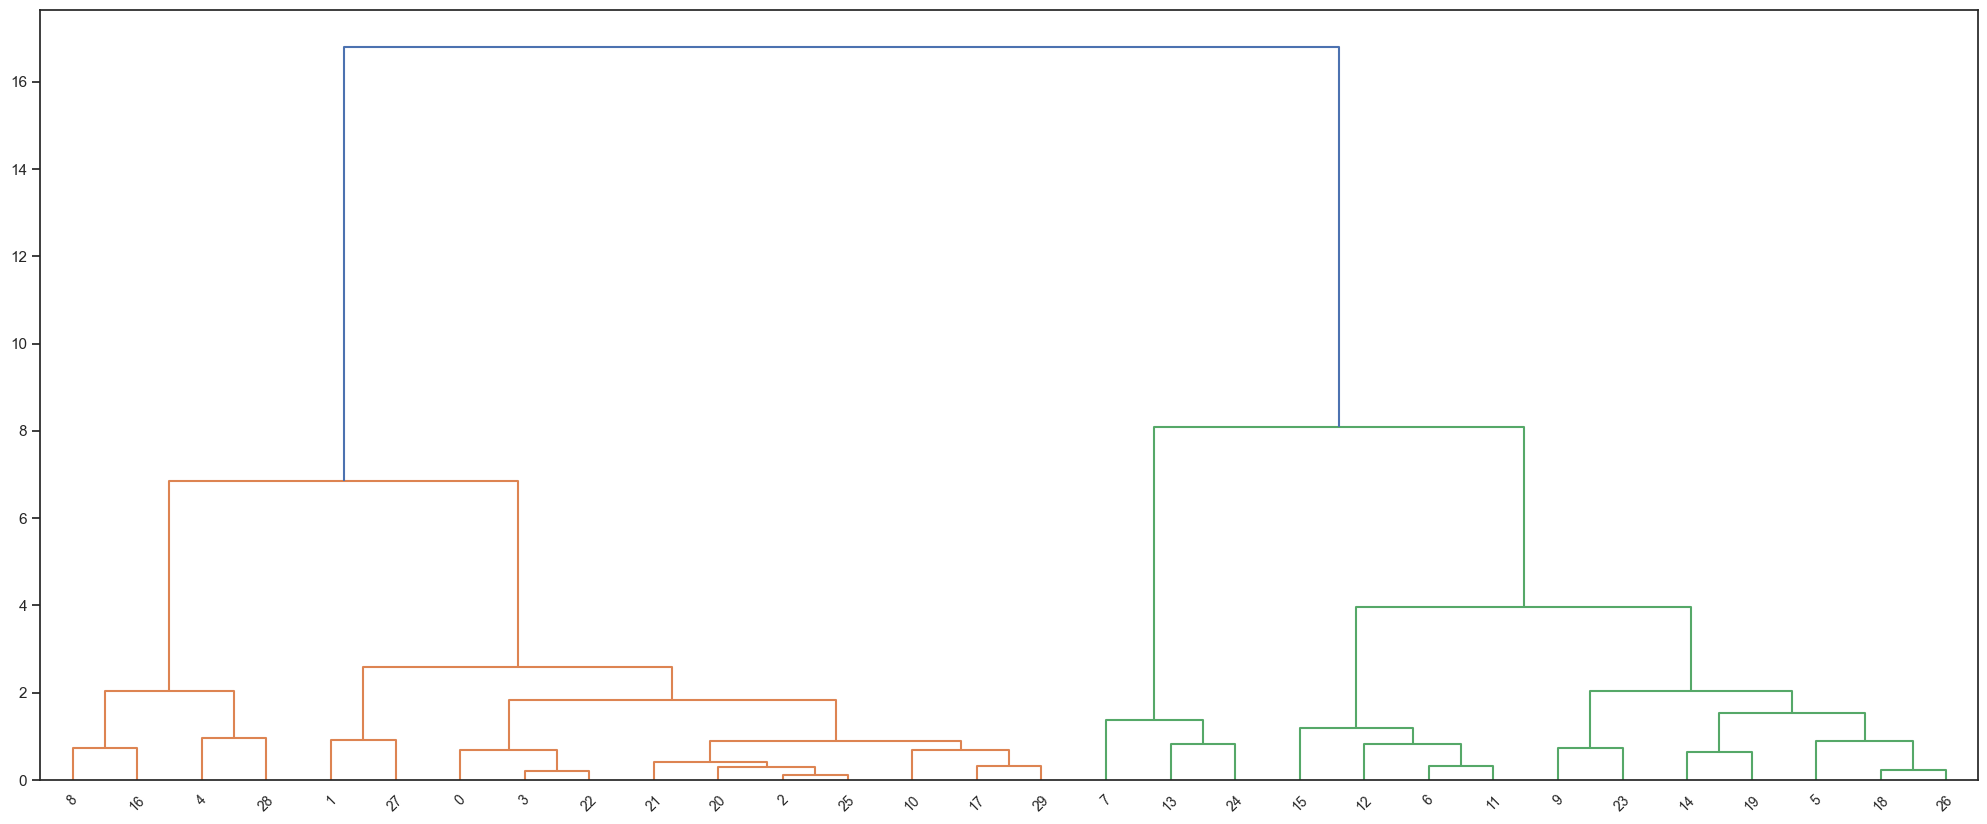

In [637]:
Z = linkage(dist, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Let's show the same as above truncating below level 4

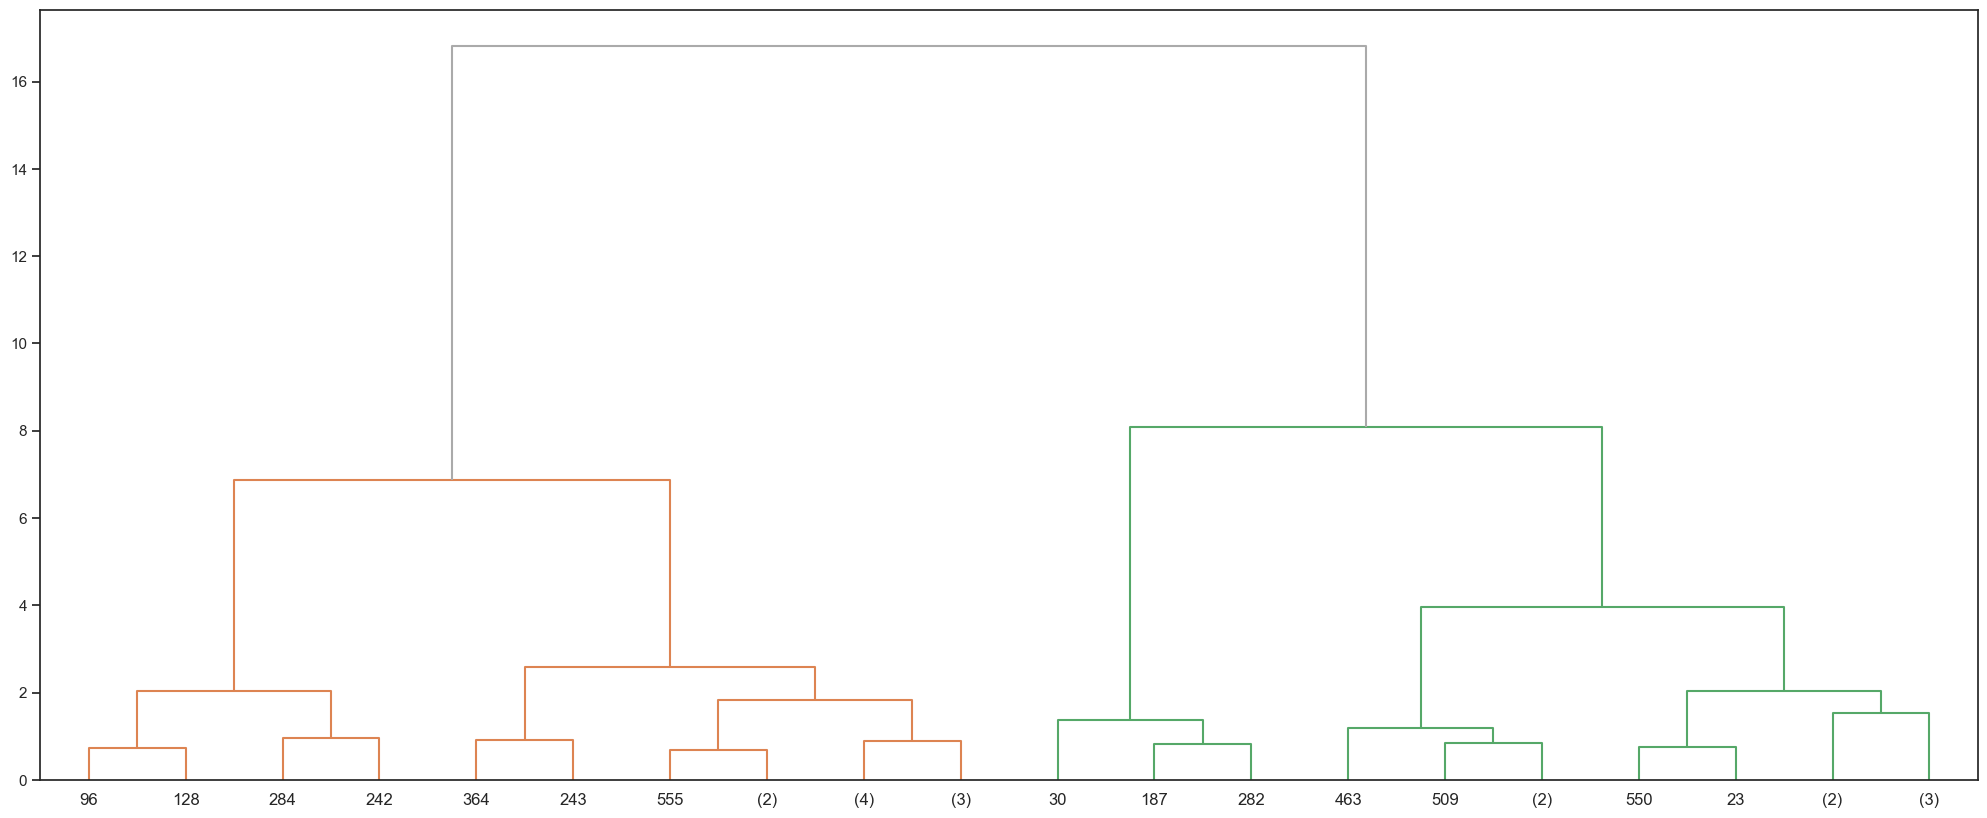

In [638]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, truncate_mode='level', p=4, above_threshold_color = '#AAAAAA', labels = df.index)

Let's color the cluster using a given threshold

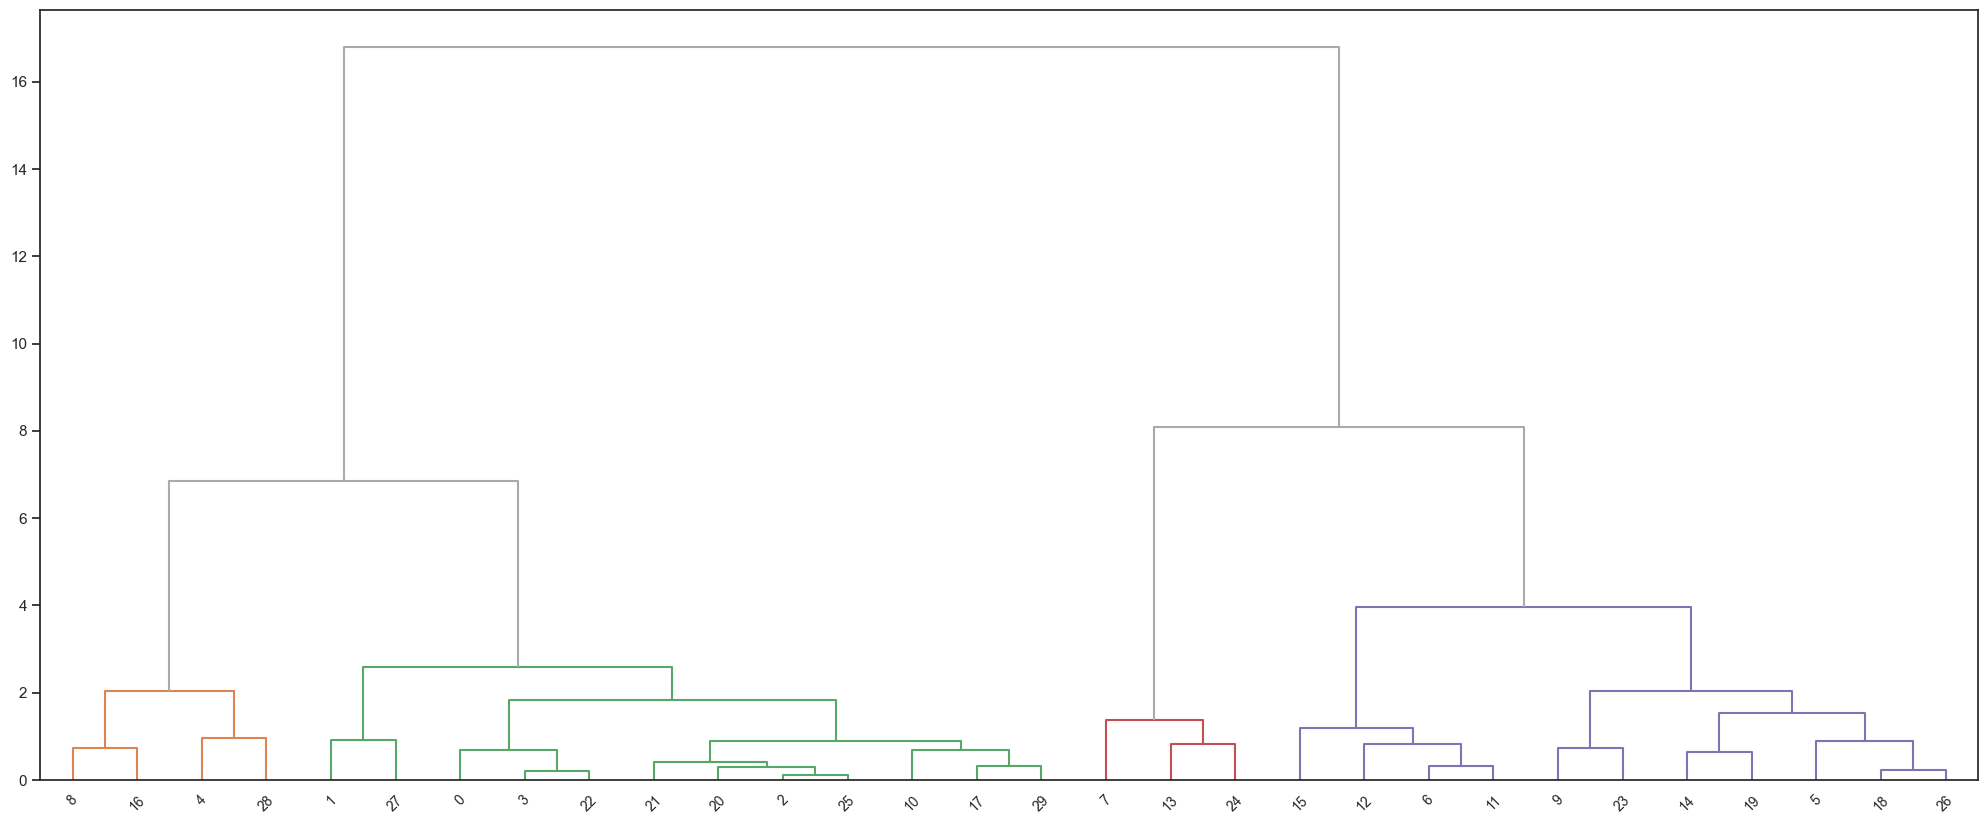

In [639]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, above_threshold_color = '#AAAAAA', color_threshold=4)

# Semi supervised learning

This is the case when we use both labeled and unlabeled data to improve our classification

There are two main strategies:

## Label propagation

Do label propagation of the unlabeled data first (see Zhu & Ghahramani, 2002,  http://pages.cs.wisc.edu/~jerryzhu/pub/CMU-CALD-02-107.pdf)

Let $(x_1, y_1)...(x_l, y_l)$ be labeled data, where $Y_L = \lbrace y_1, ..y_l \rbrace$ are the class labels.

We assume the number of classes $C$ is known, and all classes are present in the labeled data. 

Let $(x_{l+1}, y_{l+1}, ... (x_{l + u}, y_{l + u})$ be unlabeled data where $Y_U = \lbrace y_{l + 1}, ... y_{l +u} \rbrace$ are unobserved, usually $l << u$

The problem is estimating $Y_U$ from $X$ and $Y_L$, which is a **transductive learning** setting.

Also define a $(l+u) \times C$ label matrix $Y$, whose $ith$ row represents the label probability distribution of node $x_i$.

Define $T_{ij}$ the probabilistic transition matrix:

$\Large T_{ij} = P(j \rightarrow i) = \frac{w_{ij}}{\sum\limits_{k=1}^{l+u} w_{kj}}$

where

$\Large w_{ij} = \exp\biggl(-\frac{d_{ij}^2}{\sigma^2}\biggr)$, which is controled by parameter $\sigma$

*Algorithm*

1. Propagate $Y \leftarrow T Y$

2. Row normalize $Y$

3. Clamp the labeled data. Repeat from step 1 until $Y$ converges

Incorporating a priori class proportions can greatly help the algorithm.

With this information one can do class mass normalization (normalize class mass to fit class proportions) or label bidding (only a certain number of labels are available to the highest probability elements according to class proportions)

![](data/labelpropagation.png)

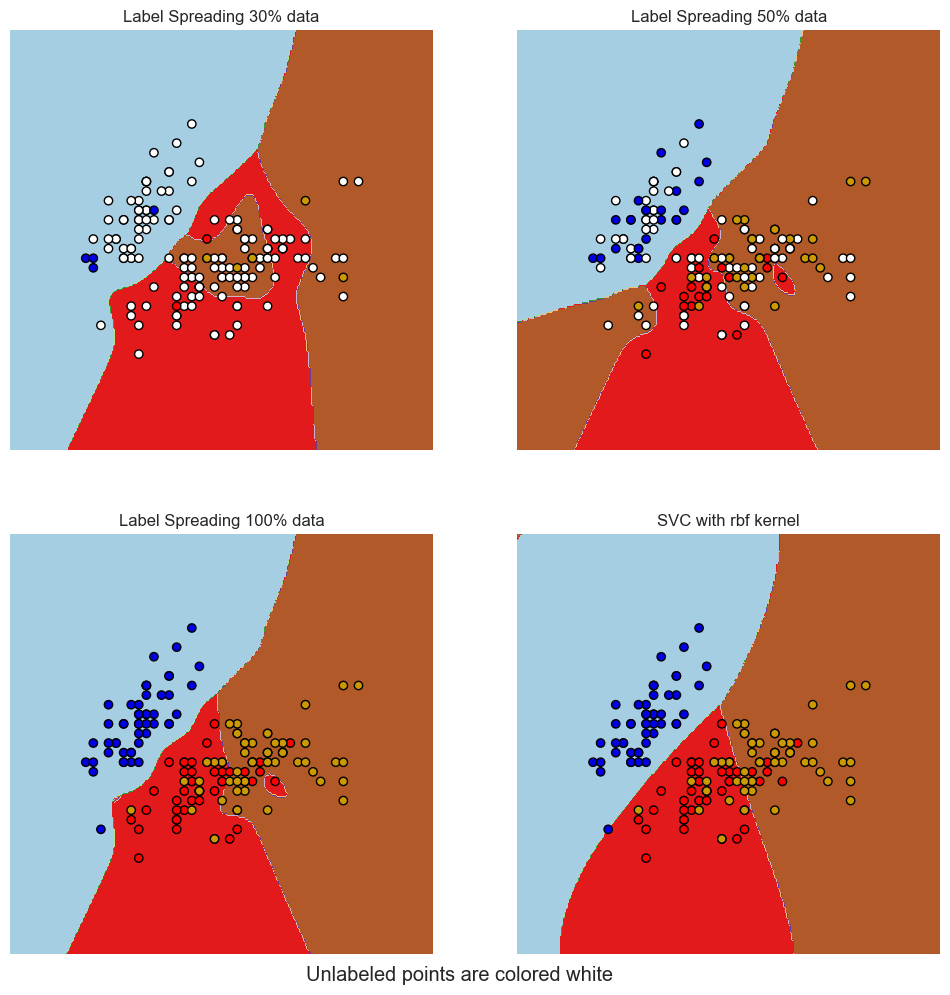

In [640]:
# https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_versus_svm_iris.html#sphx-glr-auto-examples-semi-supervised-plot-label-propagation-versus-svm-iris-py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import LabelPropagation, LabelSpreading

rng = np.random.RandomState(0)

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

# step size in the mesh
h = .02

y_30 = np.copy(y)
y_30[rng.rand(len(y)) < 0.90] = -1
y_50 = np.copy(y)
y_50[rng.rand(len(y)) < 0.5] = -1

mask = rng.rand(len(y)) <= 0.1
y_10 = y[mask]
X_10 = X[mask]


# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (LabelSpreading().fit(X, y_30),
        y_30)
ls50 = (LabelSpreading().fit(X, y_50),
        y_50)
ls100 = (LabelSpreading().fit(X, y), y)
rbf_svc = (svm.SVC(kernel='rbf', gamma=.5).fit(X, y), y)
#rbf_svc_10 = (svm.SVC(kernel='rbf', gamma=.5).fit(X_10, y_10), y_10)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['Label Spreading 30% data',
          'Label Spreading 50% data',
          'Label Spreading 100% data',
          'SVC with rbf kernel']

color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}

plt.figure(figsize = (12, 12))

for i, (clf, y_train) in enumerate((ls30, ls50, ls100, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)# figsize = (20, 20))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')

    plt.title(titles[i])

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()

In [641]:
len(X_10)

20

## Autoencoders

Learn to compress and uncompress both labeled and unlabeled data, which doesn't require labels, classify in the compressed (latent) space.  More on how to do this in the following classes.

![](data/autoencoder.png)